# Contradictory claims -- context association analyses

Dan Sosa

Updated: 5/21/21

This notebook features completed pipeline for context-relation association analyses, including descriptive statistics, classification, and some downstream analyses. 

### Initial pipeline for loading data and extracting papers

In [89]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features

print("Done loading pkg")

contra_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv"
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"


dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
# NOTE! Make sure to parse_annotated first. Need to fix code to not overwrite
dl.parse_annotated_full_texts(cell_type_only=True) # tot: 21243
print("Done with full texts")
dl.parse_relationships_file()
print("Done with relationships")
all_annotators_df, annotated_connects = dl.parse_annotation_files_for_ena()

if not path.exists(contra_df_path):
    print("Need to extract features for Contradictions papers corpus") # Will take 1h20!
    #contra_df = extract_features(dl.paper_pile, no_cell_line=True) # NOTE We don't have MeSH headings for these yet....
    #contra_df.to_csv(contra_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for Contradictions papers")
    contra_df = pd.read_csv(contra_df_path)
    print("Loaded.")
    
if not path.exists(ena_df_path):
    print("Need to extract features for ENA papers corpus")
    #ena_df = extract_features(dl.ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=True, is_enrique=True)
    #ena_df.to_csv(ena_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for ENA papers")
    ena_df = pd.read_csv(ena_df_path)
    print("Loaded.")    

    

print(len(contra_df))
print(len(ena_df))
print(len(dl.paper_pile))


Done loading pkg
Done initializing
0 full texts read (of 21243)
No PMC for record 95
No PMC for record 111
No abstract for record PMC5509451
No title for record PMC4757870
No PMC for record 291
No abstract for record PMC5599977
No abstract for record PMC3953084
No title for record PMC6896798
No PMC for record 655
No abstract for record PMC6220479
No abstract for record PMC5482590
No abstract for record PMC4075648
No PMC for record 982
1000 full texts read (of 21243)
No text for record PMC2478564
No abstract for record PMC526782
No PMC for record 1419
No abstract for record PMC4694057
No PMC for record 1744
No PMC for record 1921
No title for record PMC6361748
No PMC for record 1984
No PMC for record 1993
No PMC for record 1993
2000 full texts read (of 21243)
No abstract for record PMC3784508
No PMC for record 2089
No abstract for record PMC7113201
No abstract for record PMC5374603
No abstract for record PMC3287601
No title for record PMC6803382
No abstract for record PMC4044980
No abst

/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/DataLoader.py:367: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Extracted features file found for Contradictions papers
Loaded.
Extracted features file found for ENA papers
Loaded.
1102208
30239
21209


In [14]:
dl.ena_paper_pile['PMC2156142']

In [100]:
set(ena_df.paper_id)

{'PMC2156142',
 'PMC3032653',
 'PMC3135394',
 'PMC3198449',
 'PMC3233644',
 'PMC3461631',
 'PMC4052680',
 'PMC4250046',
 'PMC4746590',
 'PMC534114'}

In [33]:
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"
ena_df = pd.read_csv(ena_df_path)

In [104]:
ena_df[ena_df.annotation == False][ena_df.paper_id == "PMC2156142"]

/var/folders/p9/8pp847bn49bbsx879fpbsqs00000gn/T/ipykernel_89555/4064529986.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ena_df[ena_df.annotation == False][ena_df.paper_id == "PMC2156142"]


Unnamed: 0    paper_id  \
0     0           PMC2156142   
1     1           PMC2156142   
2     2           PMC2156142   
3     3           PMC2156142   
4     4           PMC2156142   
...  ..                  ...   
2221  2221        PMC2156142   
2222  2222        PMC2156142   
2223  2223        PMC2156142   
2224  2224        PMC2156142   
2225  2225        PMC2156142   

                                                                                                                                                                                                                                        rel  \
0     Particular rabs are localized to distinct intracellular compartments , and mutant forms of these proteins impair the trafficking of vesicles from one intracellular compartment to another .                                            
1     Particular rabs are localized to distinct intracellular compartments , and mutant forms of these proteins impair the trafficking of vesicles from one intracellular compartment to another .                                            
2     Particular rabs are localized to distinct intracellular compartments , and mutant forms of these proteins impair the trafficking of vesicles from one intracellular compartment to another .                                            
3     Particular rabs are localized to distinct intracellular compartments , and mutant forms of these proteins impair the trafficking of vesicles from one intracellular compartment to another .                                            
4     Particular rabs are localized to distinct intracellular compartments , and mutant forms of these proteins impair the trafficking of vesicles from one intracellular compartment to another .                                            
...                                                                                                                                                                                            ...                                            
2221  The bristle phenotype of the warthog mutants , however , reveals there is a limitation to which an organism can compensate for mutations in Drab6 , even if redundant or independent pathways exist for transport through the Golgi .   
2222  The bristle phenotype of the warthog mutants , however , reveals there is a limitation to which an organism can compensate for mutations in Drab6 , even if redundant or independent pathways exist for transport through the Golgi .   
2223  The bristle phenotype of the warthog mutants , however , reveals there is a limitation to which an organism can compensate for mutations in Drab6 , even if redundant or independent pathways exist for transport through the Golgi .   
2224  The bristle phenotype of the warthog mutants , however , reveals there is a limitation to which an organism can compensate for mutations in Drab6 , even if redundant or independent pathways exist for transport through the Golgi .   
2225  The bristle phenotype of the warthog mutants , however , reveals there is a limitation to which an organism can compensate for mutations in Drab6 , even if redundant or independent pathways exist for transport through the Golgi .   

             con  \
0     drosophila   
1     yeast        
2     drosophila   
3     scutellum    
4     vesicles     
...        ...     
2221  eye          
2222  eye          
2223  eye          
2224  scutellum    
2225  drosophila   

                                                                                                                                                                                        con_sent  \
0     The warthog  ( wrt ) gene, recovered as a modifier for Notch signaling, was found to encode the Drosophila  homologue of rab6, Drab6.                                                        
1     Vertebrate and yeast homologues of this protein have been shown to regulate Golgi network to TGN trafficking.    

In [105]:
set(ena_df[ena_df.paper_id == "PMC2156142"].rel)



{'Aberrations in transport through the TGN especially would be expected to affect Notch as this transmembrane protein undergoes a cleavage modification in the TGN to produce the functional heterodimeric receptor at the cell surface .',
 'All progeny with the genotype P2352 and P2352 developed past embryogenesis , showing that a maternal contribution is not responsible for survival of wrt P2352  through embryonic development .',
 'Both of these rab6 mutations led to a kinetic inhibition of proteins presented to the cell surface ; in pulse-chase experiments , cells that overexpress wild-type or either mutant form of rab6 ( Q72L or T27N ) eventually secrete the same quantity of extracellular proteins as controls , but the rate of release is markedly decreased .',
 'Cloning of the gene revealed it encoded the Drosophila homologue of rab6 , or Drab6 ( Satoh et al. 1997 ) .',
 'Contrary to the R62C alleles , this mutation also affected the smaller bristles , called microchaete , on the head 

## Descriptive Statistics

### Number of context-event section-level co-occurrences

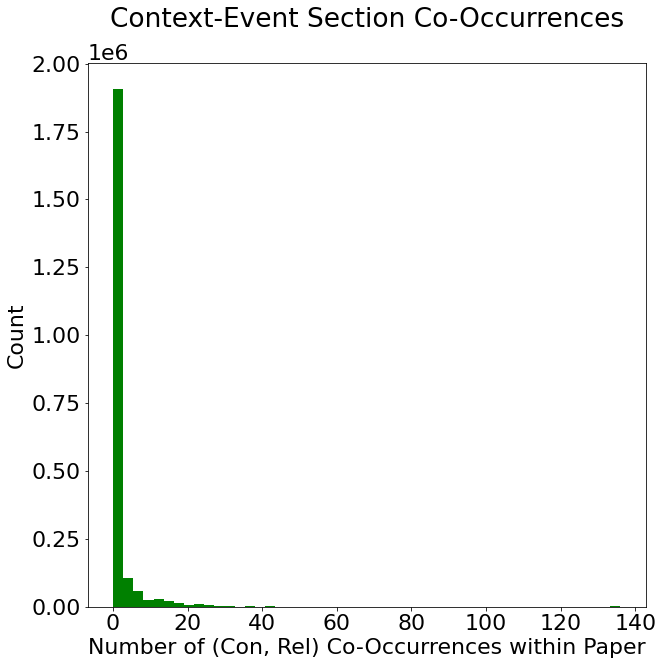

In [7]:
import matplotlib
import matplotlib.pyplot as plt

# Co-occurrences

fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 22})

            
co_occur_cts = list(contra_df.num_sec_cooccur_ent_1) + list(contra_df.num_sec_cooccur_ent_2)

plt.hist(co_occur_cts, bins = 50, color="green")
    
plt.title("Context-Event Section Co-Occurrences\n")
plt.xlabel("Number of (Con, Rel) Co-Occurrences within Paper")
plt.ylabel("Count")
plt.show()

### Distributions of Sentence and Paragraph Distances

Text(0.04, 0.5, 'Count')

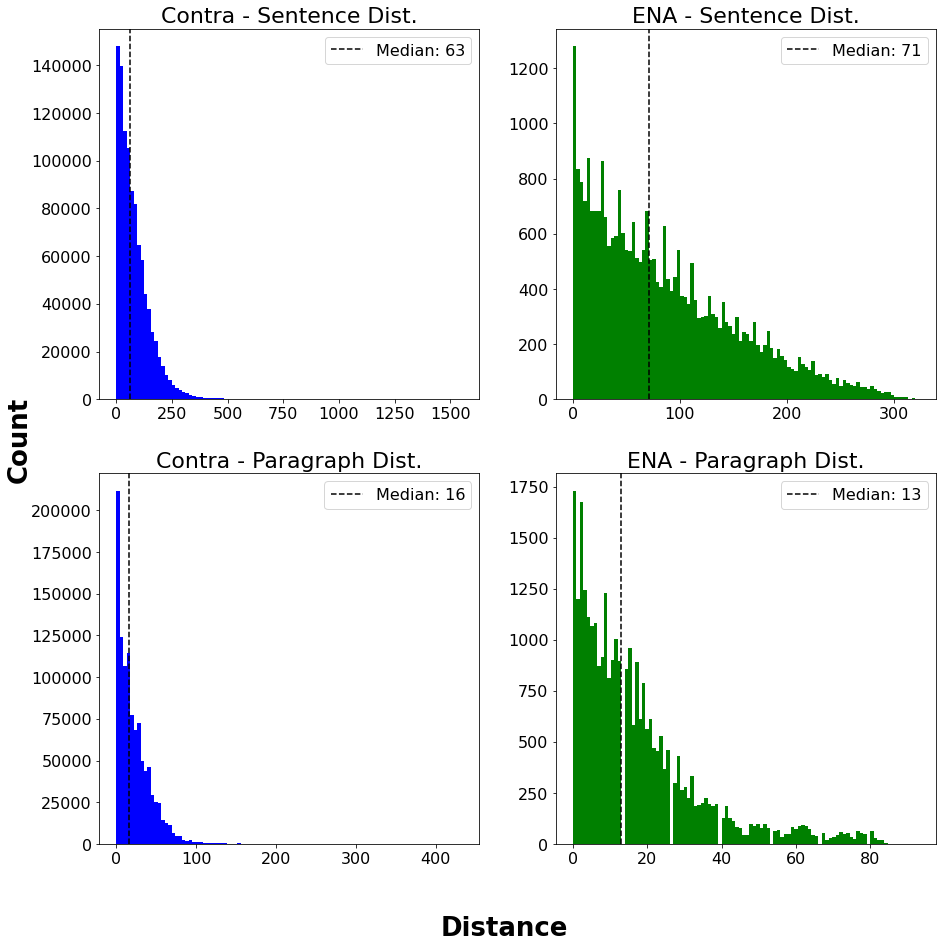

In [129]:
import matplotlib
import matplotlib.pyplot as plt

# Distances

plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0,0].axvline(np.median(contra_df.sent_dist.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(contra_df.sent_dist.dropna()))}")
axs[0,0].hist(list(contra_df.sent_dist), bins = 100, color="blue")
axs[0,0].legend()
axs[0,0].set_title('Contra - Sentence Dist.', fontsize=22)

axs[0,1].axvline(np.median(ena_df.sent_dist.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(ena_df.sent_dist.dropna()))}")
axs[0,1].hist(list(ena_df.sent_dist), bins = 100, color="green")
axs[0,1].legend()
axs[0,1].set_title('ENA - Sentence Dist.', fontsize=22)

axs[1,0].axvline(np.median(contra_df.sec_dist.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(contra_df.sec_dist.dropna()))}")
axs[1,0].hist(list(contra_df.sec_dist), bins = 100, color="blue")
axs[1,0].legend()
axs[1,0].set_title('Contra - Paragraph Dist.', fontsize=22)

axs[1,1].axvline(np.median(ena_df.sec_dist.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(ena_df.sec_dist.dropna()))}")
axs[1,1].hist(list(ena_df.sec_dist), bins = 100, color="green")
axs[1,1].legend()
axs[1,1].set_title('ENA - Paragraph Dist.', fontsize=22)

fig.text(0.5, 0.04, 'Distance', ha='center', fontsize=26, fontweight='bold')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=26, fontweight='bold')


In [123]:
ena_df.sent_dist.dropna()

0        10.0 
1        9.0  
2        6.0  
3        4.0  
4        0.0  
        ...   
30234    114.0
30235    129.0
30236    130.0
30237    64.0 
30238    64.0 
Name: sent_dist, Length: 29987, dtype: float64

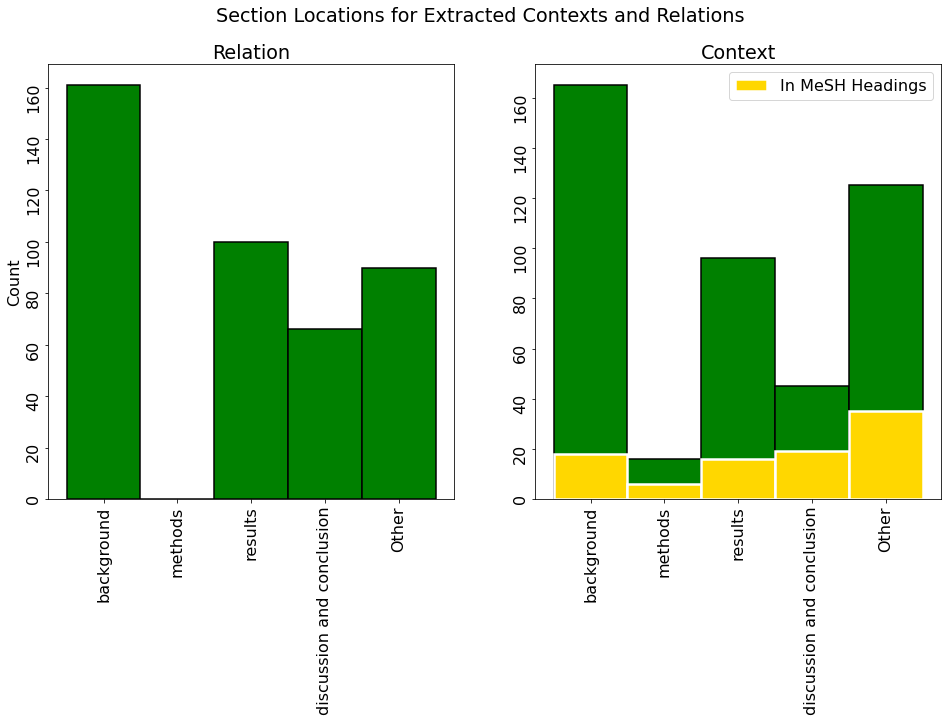

In [9]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# In MESH

fig, axs = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.suptitle("Section Locations for Extracted Contexts and Relations")

plt.rcParams.update({'font.size': 16})

my_order = ["background", "methods", "results", "discussion and conclusion", "Other"]

norm_rel_sec = list(ena_df.groupby(['rel']).sample(n=1)["norm_rel_sec"])
norm_rel_sec = ['Other' if v is None else v for v in norm_rel_sec]

ct = Counter(norm_rel_sec)
labels = my_order
values = [ct[k] for k in my_order]

axs[0].bar(np.arange(len(labels)), values, width=1, color="green", edgecolor='black', linewidth=1.5)
axs[0].set_title("Relation")
axs[0].tick_params(labelrotation=90)
axs[0].set_xticks(np.arange(len(labels))+0) 
axs[0].set_xticklabels(labels, fontsize=16)
axs[0].set_ylabel("Count")
    
    
norm_con_sec = list(ena_df.groupby(['con_sent']).sample(n=1)["norm_con_sec"])
norm_con_sec = ['Other' if v is None else v for v in norm_con_sec]
ct = Counter(norm_con_sec)
labels = my_order
values = [ct[k] for k in my_order]

con_mesh = list(ena_df[ena_df.con_in_mesh_headings == True].groupby(['con_sent']).sample(n=1)["norm_con_sec"])
con_mesh = ['Other' if v is None else v for v in con_mesh]
ct_mesh = Counter(con_mesh)
labels_mesh = my_order
values_mesh = [ct_mesh[k] for k in my_order]

axs[1].bar(np.arange(len(labels)), values, width=1, color="green", edgecolor='black', linewidth=1.5)
axs[1].bar(np.arange(len(labels_mesh)), values_mesh, width=1, color="gold", edgecolor='white', linewidth=2.5, label="In MeSH Headings")
axs[1].legend()
axs[1].set_title("Context")
axs[1].tick_params(labelrotation=90)
axs[1].set_xticks(np.arange(len(labels))+0) 
axs[1].set_xticklabels(labels, fontsize=16)
   
plt.show()

### Number of context mentions per paper

Text(0.04, 0.5, 'Count')

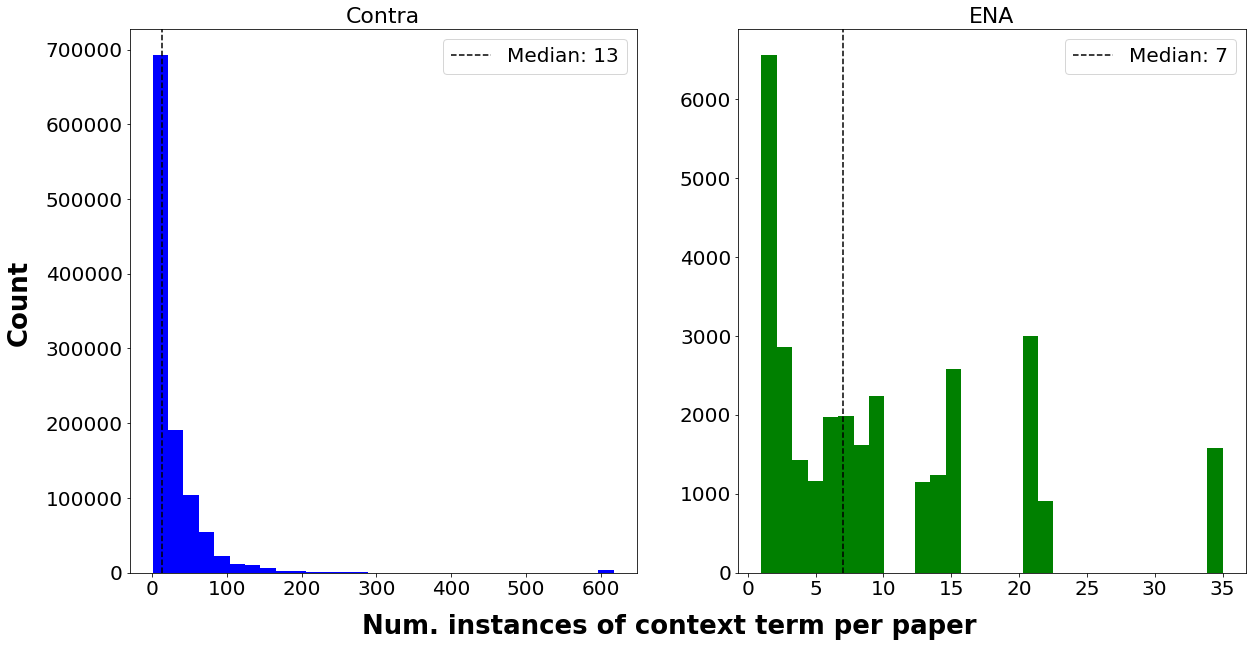

In [130]:
import matplotlib
import matplotlib.pyplot as plt

# Co-occurrences

plt.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,15))
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].axvline(np.median(contra_df.num_con_mentions.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(contra_df.num_con_mentions.dropna()))}")
axs[0].hist(list(contra_df.num_con_mentions), bins = 30, color="blue")
axs[0].set_title('Contra', fontsize=22)
axs[0].legend()

axs[1].axvline(np.median(ena_df.num_con_mentions.dropna()), color="black", linestyle='--',
                linewidth=1.5,label=f"Median: {int(np.median(ena_df.num_con_mentions.dropna()))}")
axs[1].hist(list(ena_df.num_con_mentions), bins = 30, color="green")
axs[1].set_title('ENA', fontsize=22)
axs[1].legend()

fig.text(0.5, 0.04, 'Num. instances of context term per paper', ha='center', fontsize=26, fontweight='bold')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=26, fontweight='bold')


In [139]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.metrics import plot_confusion_matrix

def generate_analysis_figs(in_df, 
                           grouped_analysis=False,
                           downsample_maj=True, 
                           upsample_min=False, 
                           weight_imbalance=False, 
                           plot_roc_curve=True, 
                           plot_confusion_matrices=True,
                           plot_feature_analysis=True,
                           SEED=44):
    
    
    # Pre-process the data
    if not grouped_analysis:
        model_contra_df = in_df[['rel', 'con_sent', 'con', 'sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']].drop_duplicates().dropna()
    else:
        in_df_grp = in_df.groupby(['rel', 'con'])
        in_df_grp_features = in_df.assign(min_sent_dist=in_df_grp['sent_dist'].transform(min),
                                          min_sec_dist=in_df_grp['sec_dist'].transform(min),
                                          any_con_fp=in_df_grp['is_con_fp'].transform(max),
                                          any_rel_disc_conc=in_df_grp['norm_rel_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                                          any_rel_background=in_df_grp['norm_rel_sec'].transform(lambda x: x.eq('background').any()),
                                          any_rel_methods=in_df_grp['norm_rel_sec'].transform(lambda x: x.eq('methods').any()),
                                          any_rel_results=in_df_grp['norm_rel_sec'].transform(lambda x: x.eq('results').any()),
                                          any_con_disc_conc=in_df_grp['norm_con_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                                          any_con_background=in_df_grp['norm_con_sec'].transform(lambda x: x.eq('background').any()),
                                          any_con_methods=in_df_grp['norm_con_sec'].transform(lambda x: x.eq('methods').any()),
                                          any_con_results=in_df_grp['norm_con_sec'].transform(lambda x: x.eq('results').any()),)
        
        model_contra_df = in_df_grp_features[['rel', 'con', 'min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc', 'annotation']].drop_duplicates().dropna()
        
    mc_df_neg = model_contra_df[model_contra_df.annotation==False]
    mc_df_pos = model_contra_df[model_contra_df.annotation==True]
    if len(mc_df_neg) > len(mc_df_pos):
        mc_df_maj, mc_df_min = mc_df_neg, mc_df_pos
    else:
        mc_df_maj, mc_df_min = mc_df_pos, mc_df_neg
    
    if upsample_min:
        mc_df_min_up = resample(mc_df_min, replace=True, n_samples=len(mc_df_maj), random_state=SEED)
        model_contra_df = pd.concat([mc_df_maj, mc_df_min_up])
        
    elif downsample_maj:
        mc_df_maj_down = resample(mc_df_maj, replace=False, n_samples=len(mc_df_min), random_state=SEED)  
        model_contra_df = pd.concat([mc_df_maj_down, mc_df_min])
    
    model_contra_df.con_in_mesh_headings = model_contra_df.con_in_mesh_headings.astype(int)

    if not grouped_analysis:
        df = pd.get_dummies(model_contra_df[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'annotation']])
    else:
        df = pd.get_dummies(model_contra_df[['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc', 'annotation']])
                                                                                                   
    X_train, X_test, y_train, y_test = train_test_split(df.drop(["annotation"], axis=1), df["annotation"], test_size=1.0/3, random_state=SEED)
    print(len(df))
    
    # Train the classifiers
    if not weight_imbalance:
        clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear'), 
                    SVC(kernel='linear', random_state=44, probability=True),
                    SVC(kernel='rbf', random_state=44, probability=True),
                    RandomForestClassifier(random_state=44),
                    MLPClassifier(random_state=44),
                    GradientBoostingClassifier(random_state=44)]
    else:
        clf_list = [LogisticRegression(penalty='l2', random_state=44, solver='liblinear', class_weight='balanced'), 
                    SVC(kernel='linear', random_state=44, probability=True, class_weight='balanced'),
                    SVC(kernel='rbf', random_state=44, probability=True, class_weight='balanced'),
                    RandomForestClassifier(random_state=44, class_weight='balanced'),
                    MLPClassifier(random_state=44),
                    GradientBoostingClassifier(random_state=44)]
    labels = ["Logistic Reg", 
              "SVM - Linear", 
              "SVM - Gaussian",
              "Random Forest",
              "FeedForward Neural Net",
              "Gradient Tree Boost"]
    colors = ["red",
             "orange",
             "green",
             "cyan",
             "blue",
             "purple"]
    ena_precs = [.543, .568, .595, .637, .633, .777]
    ena_recs = [.743, .763, .742, .686, .761, .969]
    ena_fs = [.628, .651, .660, .661, .691, .863]
    for i,clf in enumerate(clf_list):
        print(f"Fitting model: {labels[i]}")
        clf.fit(X_train, y_train) 
    
    
    # ROC Curve
    if plot_roc_curve:
        fig = plt.figure(figsize=(10, 10))
        plt.rcParams.update({'font.size': 16})

        precs = []
        recs = []
        fs = []
        for i, clf in enumerate(clf_list):
            print(f"Looking at clf: {labels[i]}")
            y_pred = clf.predict(X_test)
            print("Accuracy", metrics.accuracy_score(y_test, y_pred))
            prec, rec, f, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')
            precs.append(prec)
            recs.append(rec)
            fs.append(f)
            y_pred_proba = clf.predict_proba(X_test)[::,1]
            fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
            auc = metrics.roc_auc_score(y_test, y_pred_proba)
            plt.plot(fpr,tpr,label=f"{labels[i]}, AUC={round(auc, 3)}", color=colors[i])
            plt.legend(loc=4)    

        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        plt.show()

        fig = plt.figure(figsize=(10, 10))
        width = 0.2
        x = np.arange(len(precs))
        plt.bar(x-0.2, precs, width, color='orange')
        for i,v in enumerate(precs):
            plt.text(i-.12, v+.01, str(round(v, 3)), color="black", ha='right', fontsize=12)            
        plt.bar(x, recs, width, color='green')
        for i,v in enumerate(recs):
            plt.text(i, v+.01, str(round(v, 3)), color="black", ha='center', fontsize=12)
        plt.bar(x+0.2, fs, width, color='blue')
        for i,v in enumerate(fs):
            plt.text(i+.12, v+.01, str(round(v, 3)), color="black", ha='left', fontsize=12)
        plt.xticks(x, labels, rotation=45, ha='right')
        plt.legend(["Precision", "Recall", "F1"], loc='lower right', framealpha=1)
        plt.ylim([0,1])
        plt.title("Classifier Metrics", size=20)
        plt.show()

    
    
    # Confusion Matrices
    if plot_confusion_matrices:
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

        for i, (clf, ax) in enumerate(zip(clf_list, axes.flatten())):
            plot_confusion_matrix(clf,
                                  X_test, 
                                  y_test,
                                  ax=ax,
                                  display_labels=["Negative", "Positive"],
                                  normalize='all',
                                  cmap=plt.cm.Blues)

            #ax.title.set_text(type(clf).__name__)
            ax.title.set_text(labels[i])
        plt.tight_layout()
        plt.show()


    # Feature Analysis
    if plot_feature_analysis:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7), sharey=True)
        
        if not grouped_analysis:  #This is super hacky!
            if len(X_train.columns) == 13:
                col_names_short = ["Sent Dist", "Sec Dist", "Num. Con Mentions", "Con is_FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Results", "Con Sec: Bkgd", "Con Sec: Disc./Conc.", "Con Sec: Methods", "Con Sec: Results"]
            else:
                col_names_short = ["Sent Dist", "Sec Dist", "Num. Con Mentions", "Con is_FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Methods", "Rel Sec: Results", "Con Sec: Bkgd", "Con Sec: Disc./Conc.", "Con Sec: Methods", "Con Sec: Results"]
        else:
            if len(X_train.columns) == 13:     
                col_names_short = ["Min. Sent Dist", "Min. Sec Dist", "Num. Con Mentions", "Any Con is FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Any Con in Bkgd", "Any Con in Methods", "Any Con in Results", "Any Con in Disc./Conc.", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Resuts"]
            else:
                col_names_short = ["Min. Sent Dist", "Min. Sec Dist", "Num. Con Mentions", "Any Con is FP", "Con is_closest_to Rel", "Con in MeSH Headings", "Any Con in Bkgd", "Any Con in Methods", "Any Con in Results", "Any Con in Disc./Conc.", "Rel Sec: Bkgd", "Rel Sec: Disc./Conc.", "Rel Sec: Methods", "Rel Sec: Resuts"]
        
        # Log Reg
        log_reg = clf_list[0]
        importance = log_reg.coef_.flatten()
        
        #polarity_colors = ["red" if x < 0 else "blue" for x in importance]      
        #axes[0].barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
        axes[0].barh(np.arange(len(importance)), importance, color="blue")
        axes[0].set_yticks(np.arange(len(importance)))
        axes[0].set_yticklabels(col_names_short, rotation=0)
        for i,v in enumerate(importance):
            #print(f"Feature {X_train.columns[i]}, Score: {v}")
            if v > 0:
                axes[0].text(v+.025, i-.16, str(round(v, 3)), ha="left", color="black")
            else:
                axes[0].text(v-.025, i-.16, str(round(v, 3)), ha="right", color="black")

        axes[0].set_xlim(min(importance)*1.5, max(importance)*1.5)
        axes[0].set_xlabel("Logistic Regression (Abs) Coefficient, $\\beta_i$")
        axes[0].set_title("Logistic Regression Feature Importance")

        # Random Forest
        rand_forest = clf_list[3]
        importance = rand_forest.feature_importances_
            
        #polarity_colors = ["red" if x < 0 else "blue" for x in importance]      
        #axes[1].barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
        axes[1].barh(np.arange(len(importance)), importance, color="blue")
        #axes[1].set_yticks(np.arange(len(importance)))
        #axes[1].set_yticklabels(col_names_short, rotation=0)
        for i,v in enumerate(importance):
            #print(f"Feature {X_train.columns[i]}, Score: {v}")
            axes[1].text(abs(v)+.01, i-.16, str(round(v, 3)), color="black")
        axes[1].set_xlim(0, max(importance)*1.15)
        axes[1].set_xlabel("Gini Importance Score ")
        axes[1].set_title("Random Forest Feature Importance")

        # Permutation
        gbc = clf_list[5]
        results = permutation_importance(gbc, X_train.astype(np.float32), y_train.astype(np.float32), scoring='neg_mean_squared_error', random_state=44)
        importance = results.importances_mean
        
        #polarity_colors = ["red" if x < 0 else "blue" for x in importance]      
        #axes[2].barh(np.arange(len(importance)), abs(importance), color=polarity_colors)
        axes[2].barh(np.arange(len(importance)), importance, color="blue")
        #axes[2].set_yticks(np.arange(len(importance)))
        #axes[2].set_yticklabels(col_names_short, rotation=0)        
        for i,v in enumerate(importance):
            #print(f"Feature {X_train.columns[i]}, Score: {v}")
            plt.text(abs(v)+.002, i-.16, str(round(v, 3)), color="black")
        axes[2].set_xlim(0, max(importance) *1.15)
        axes[2].set_xlabel("Importance Score")
        axes[2].set_title("Permutation Feature Importance\n(Gradient Boosted Trees)")

        
        plt.tight_layout()
        plt.show()
        
    
        
        
        


Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.7889447236180904
Looking at clf: SVM - Linear
Accuracy 0.7889447236180904
Looking at clf: SVM - Gaussian
Accuracy 0.5025125628140703
Looking at clf: Random Forest
Accuracy 0.7688442211055276
Looking at clf: FeedForward Neural Net
Accuracy 0.7839195979899497
Looking at clf: Gradient Tree Boost
Accuracy 0.7638190954773869


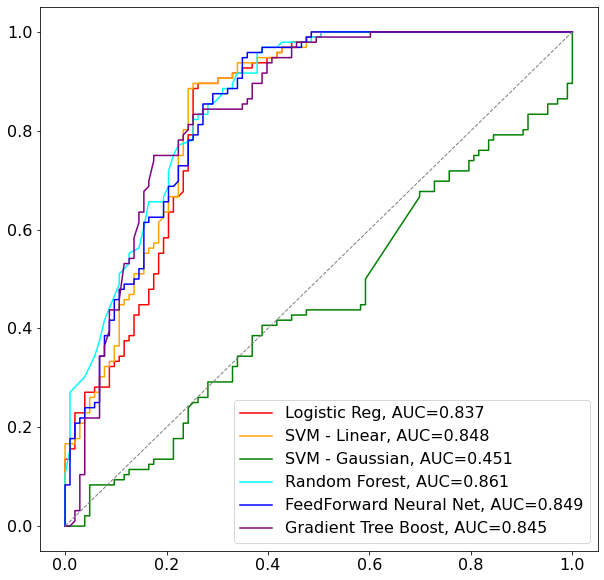

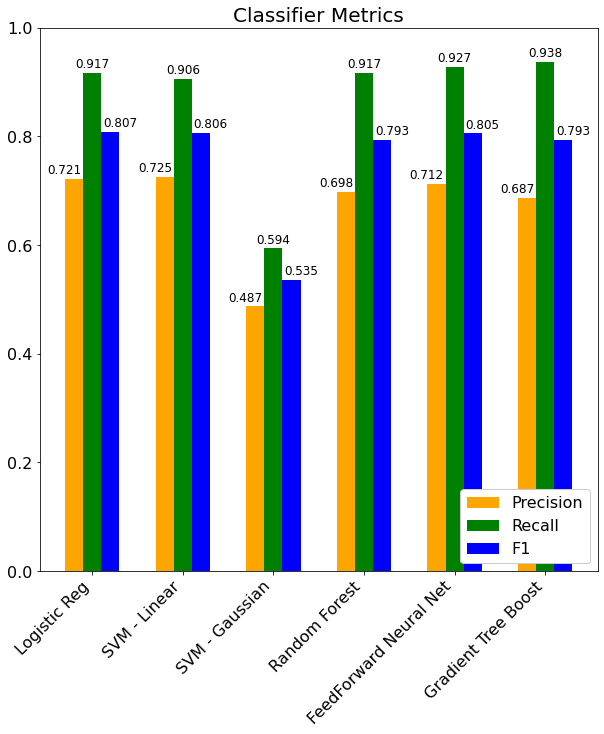

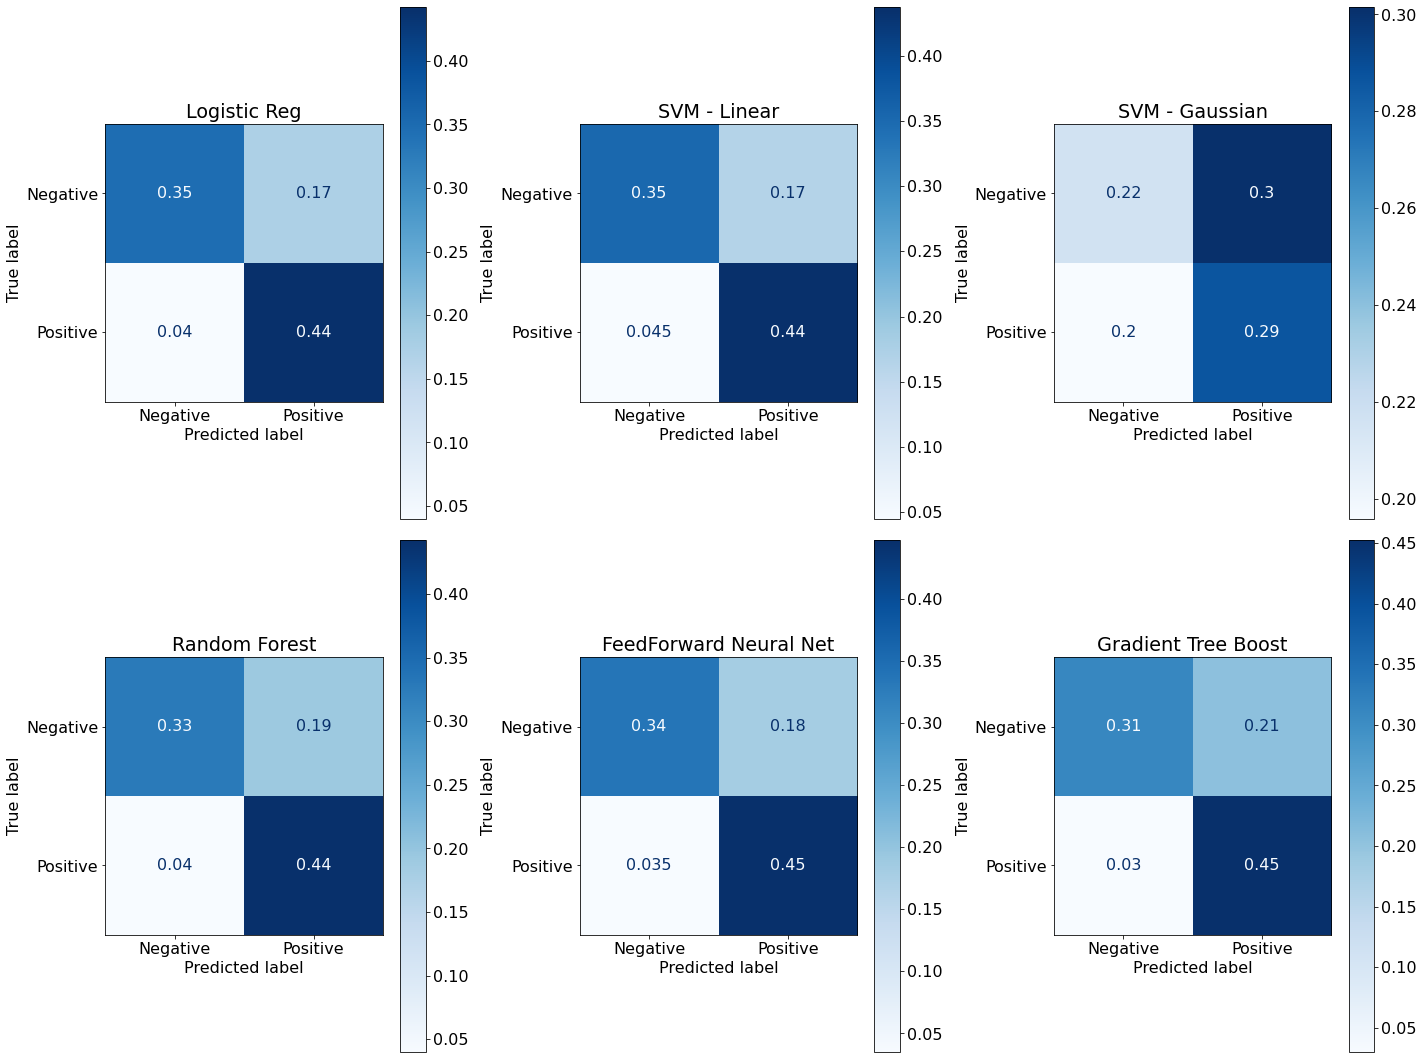

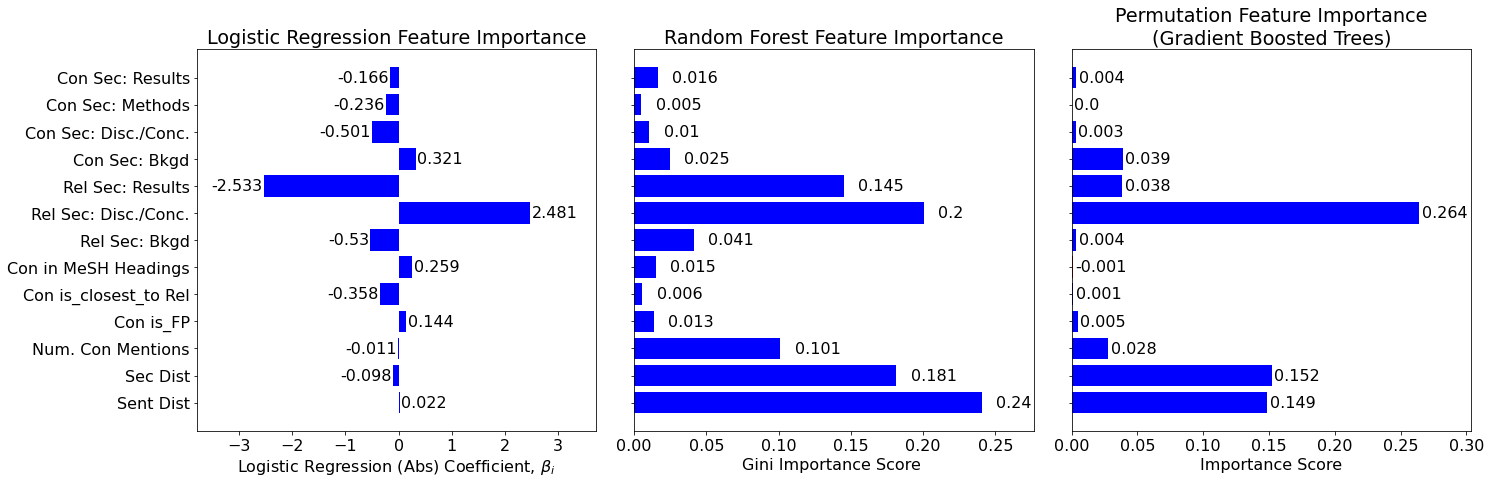

In [109]:
generate_analysis_figs(ena_df, 
                       grouped_analysis=False,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)


230
Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.7012987012987013
Looking at clf: SVM - Linear
Accuracy 0.6883116883116883
Looking at clf: SVM - Gaussian
Accuracy 0.4155844155844156
Looking at clf: Random Forest
Accuracy 0.7272727272727273
Looking at clf: FeedForward Neural Net
Accuracy 0.7142857142857143
Looking at clf: Gradient Tree Boost
Accuracy 0.7402597402597403


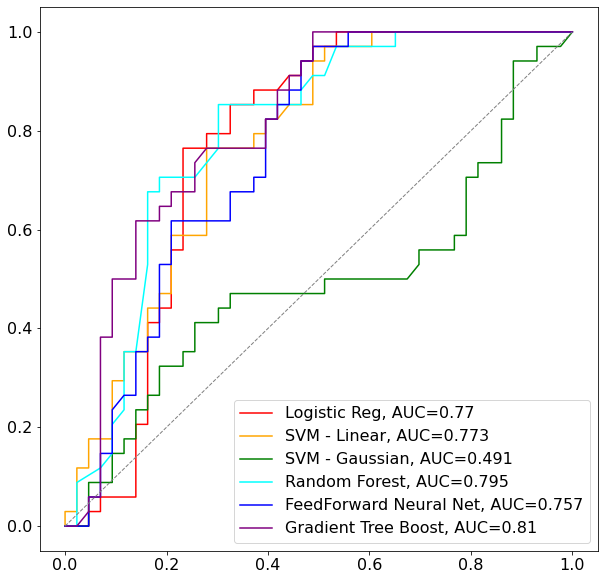

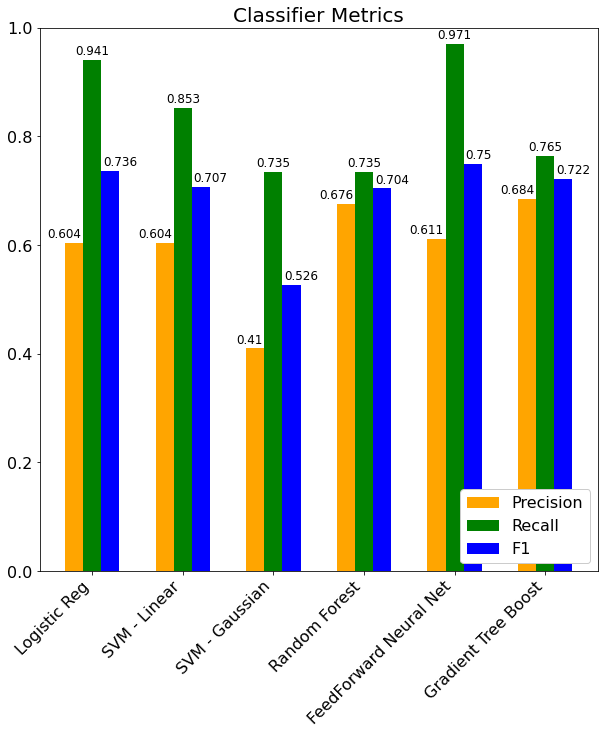

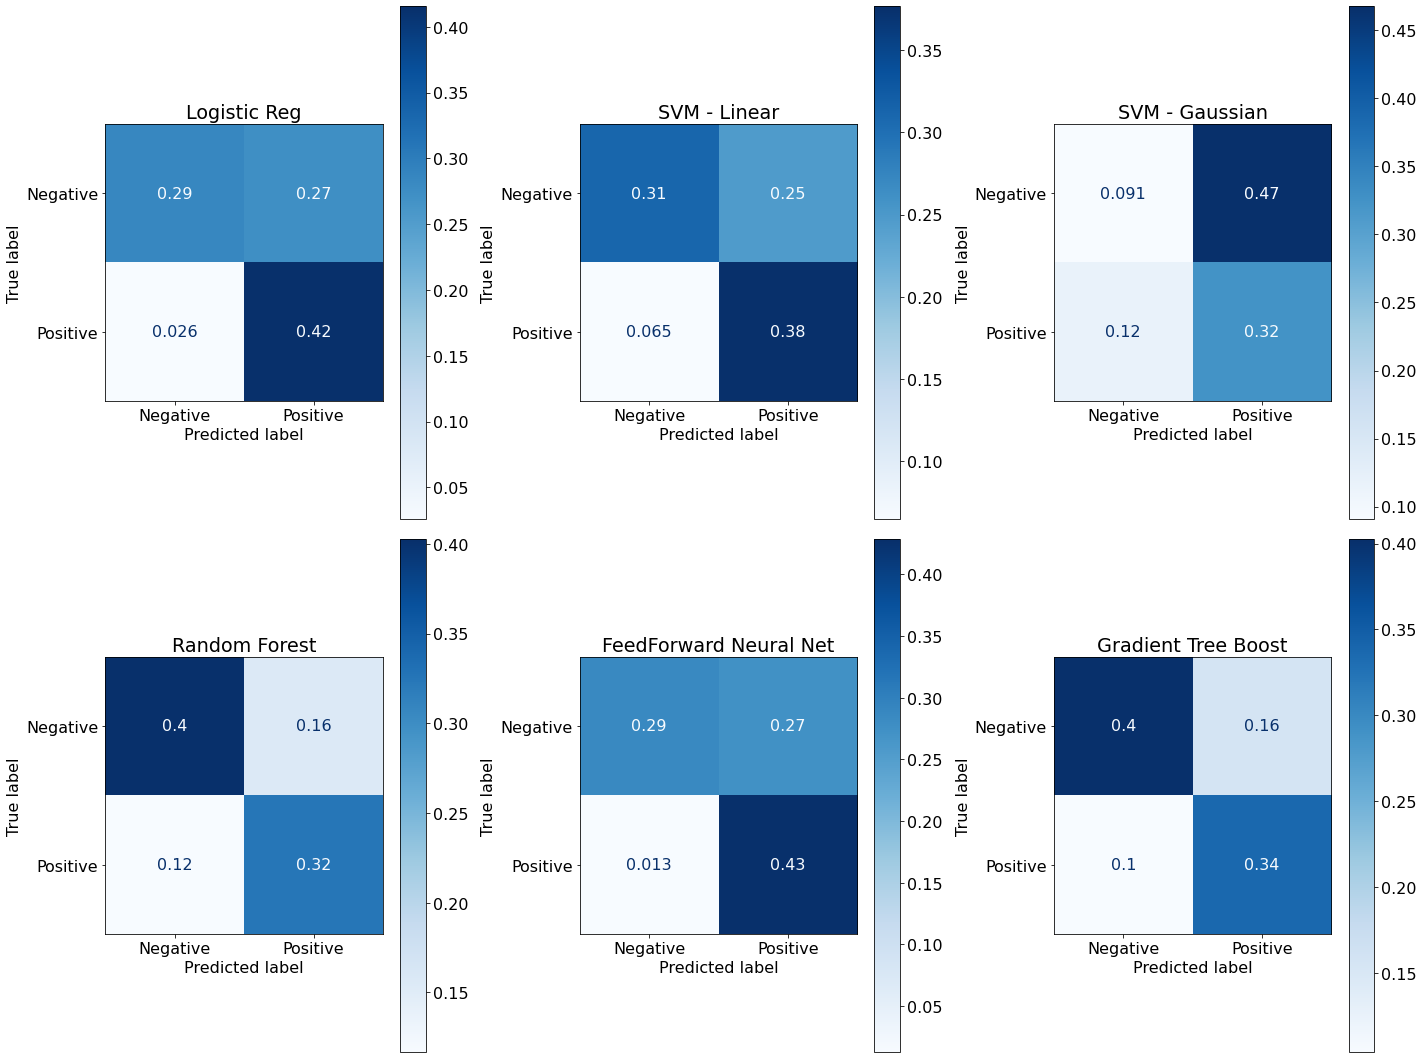

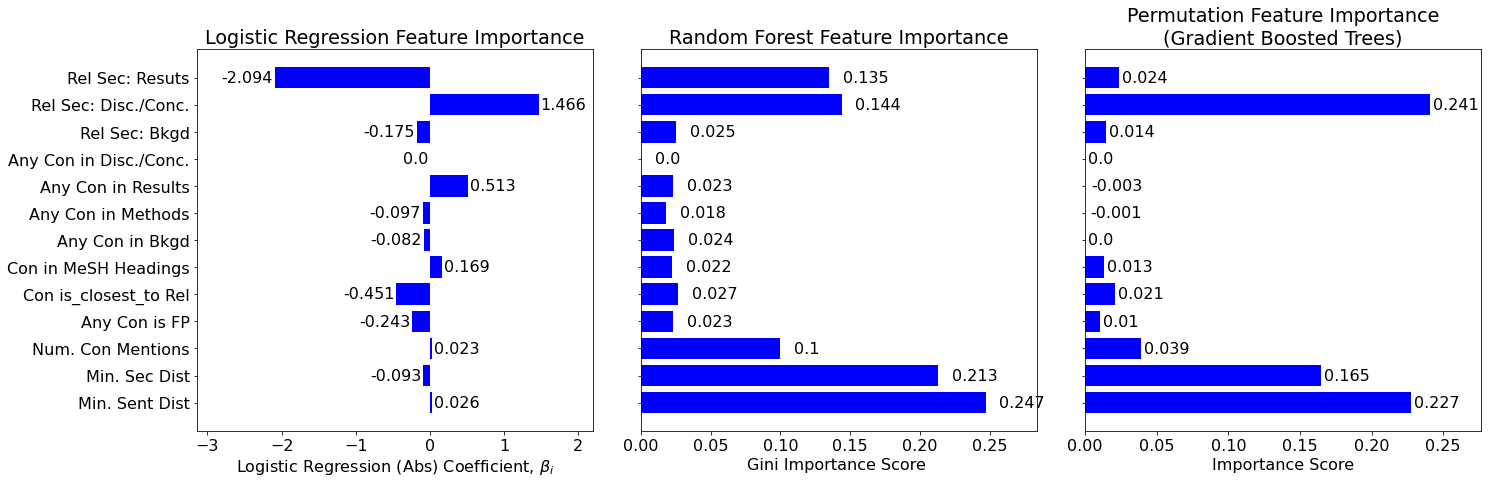

In [140]:
generate_analysis_figs(ena_df, 
                       grouped_analysis=True,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)


In [67]:
pd.set_option('display.max_colwidth', -1)

X_test["prediction"] = y_pred
ena_grp_result = model_contra_grp_df.merge(X_test, how="inner", left_index=True, right_index=True)
ena_grp_result[ena_grp_result.prediction != ena_grp_result.annotation]

# Some instances of differences

/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


rel  \
1488   Conversely , a mutation resulting in a GDP bound form of rab6 ( T27N ) shows more prominent Golgi structures and an accumulation of marker proteins in the late Golgi network .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1697   The phenotypic interaction of the wrt screen alleles was consistent with a decrease in the amount of N available for signaling on the cell surface ( Verheyen et al. 1996 ) .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1908   To determine how Drab6 affects Drosophila development beyond the larval stage , three different types of mutants were analyzed .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2023   While an essential gene , Drab6 mutations did not affect the development of the eye , wing , and leg , nor the bristle structures within these tissues .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
7865   Echoing this notion , at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ( XREF_BIBR ) .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
7870   Echoing this notion , at least in Drosophila , oxidants play an essential role in the normal differentiation of HSCs into mature progeny ( XREF_BIBR ) 

#### Evaluation on Jake's Context dataset 

Now let's see if we can do a bit more validation using Jake's annotations

In [4]:
import bioc
import pandas as pd

import re

import lit_contextizer as lc
from lit_contextizer.data_models.PaperUtilities import extract_features
from lit_contextizer.data_models.Utilities import create_contexts
from lit_contextizer.data_models.Sentence import Sentence
from lit_contextizer.data_models.Extractable import Relation
from lit_contextizer.data_models.Paper import Paper

pd.set_option('display.max_colwidth', -1)


jake_papers = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/jake_fifty/fifty_docs.bioc.xml"


annots_map = {}
df_list = []

paper2contexts = {}

with open(jake_papers, 'rb') as f:
    parser = bioc.BioCXMLDocumentReader(f)

    for doc in parser:
        
        # pmid = doc.infons["pmid"]
        # pmid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{pmid}.biocxml"
        # !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pubmed --identifier={pmid} --email=dnsosa@stanford.edu --o={pmid_out_path} --oFormat=biocxml

        # pmcid = doc.infons["pmcid"]
        # pmcid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/PMC{pmcid}.txt"
        # !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={pmcid_out_path} --oFormat=txt      
        
        rel_con_assoc = {}
        pmid = doc.infons["pmid"]
        paper2contexts[pmid] = set()
        for sec in doc.passages:
            for annot in sec.annotations:
                a_type = annot.infons["type"]
                a_id = annot.infons["conceptid"]

                if a_type == "CellContext":
                    a_norm = annot.infons["normalized"]
                    annots_map[a_id] = a_norm
                    paper2contexts[pmid].add(a_norm)
                
                elif a_type == "Species":
                    a_norm = annot.text
                    annots_map[a_id] = a_norm
        
        for sec in doc.passages:
            if len(sec.relations) > 0:
                for rel in sec.relations:
                    if rel.infons["is_citing"] == "False":
                        sen = rel.infons["formatted_sentence"]
                        cons_list = rel.infons["contexts"].split("|")
                        for assoc_con in [v.split(":")[1] for v in cons_list]:
                            row = {"rel": sen, 
                                   "con": annots_map[assoc_con], 
                                   "pmid": doc.infons["pmid"],
                                   "pmcid": doc.infons["pmcid"]
                                  }
                            df_list.append(row)

                
                            
jake_df = pd.DataFrame(df_list)
jake_df.rel = jake_df.apply(lambda row: re.sub('<[^<]+>', "", row["rel"]),axis=1)
jake_df['annot'] = 'positive'
jake_df['con'] = jake_df['con'].str.lower()



paper_ids = set(list(jake_df.pmid))  # NOTE: NO PM in front
jake_paper_pile = {}

# extract jake features

paper_dfs = []
for paper_id in paper_ids:
    paper_event_dict = {}
    pmid_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{paper_id}.biocxml"
    with open(pmid_file, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        for doc in parser:
            pmcid = doc.infons["pmcid"]
            paper_title = doc.infons["title"]
    
    full_text_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/{pmcid}.txt"  # NOTE comes with the PMC prefix
    # Open the full text
    with open(full_text_file, 'r') as f:
        pmc_txt = f.read()
        pmc_txt_reform = re.sub('\n\n', '. ', pmc_txt)

    # Create the paper
    paper = Paper(title=paper_title,
                  abstract=None,
                  full_text=pmc_txt_reform,
                  doi=paper_id,
                  pmcid=pmcid,
                  pmid=paper_id,  # DO NOT HAVE PMID FOR THESE
                  journal=None)


    # Create the relation objects    
    rel_list = list(set(jake_df[jake_df.pmid==paper_id].rel))
    for rel in rel_list:
        rel_reform = re.sub('<[^<]+>', "", rel)  # Remove XML tags
        relation = Relation(main_verb=None,
                            entity1=None,
                            entity2=None,
                            text=rel_reform,  # Remove XML tags
                            paper_pmcid=pmcid,  # TODO: fix these all being the same!
                            paper_pmid=paper_id,
                            paper_doi=paper_id,
                            start_idx=None,
                            end_idx=None,
                            sent_idx=None,
                            sentence=Sentence(rel_reform))

        paper.add_relation(relation)


    ##unique_con_terms = list(set(jake_df[jake_df.pmid==paper_id].con))
    unique_con_terms = list(paper2contexts[paper_id])
    for con in unique_con_terms:
        generic_filler_attributes = {"type": None, "pos": -9999}
        paper_event_dict[con.lower()] = generic_filler_attributes

    create_contexts(paper, paper_event_dict, pmc_txt_reform)
    jake_paper_pile[paper_id] = paper

jake_pmc_dir = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/jake_fifty_pmc/"
jake_pubmed_dir = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/"


jake_annotated_connects = set(zip([str(pmid) for pmid in jake_df.pmid], [rel.rstrip() for rel in jake_df.rel], [con.lower() for con in jake_df.con]))


/var/folders/p9/8pp847bn49bbsx879fpbsqs00000gn/T/ipykernel_89555/1653745006.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
print("Done")

Done


In [38]:
list(set(jake_df[jake_df.pmid==paper_id].con))

['hippocampal neuron']

In [71]:
paper2contexts[paper_id]

{'BAM',
 'BONA',
 'CMV',
 'CY3',
 'HEK',
 'HEK293-A',
 'HEK293T',
 'HPA',
 'MIN',
 'MRC-iPS-98',
 'MSHRIe001-A',
 'Neuro-2a',
 'PDF',
 'S10',
 'SEM',
 'SH-SY5Y',
 'Sal-BL',
 'T-lymphocytes',
 'TCS',
 'V79 SP5',
 'cancer cell',
 'hippocampal neuron',
 'neuron'}

In [44]:
for con in jake_paper_pile[paper_id].get_context_list():
    print(con.text)

neuron
sem
cmv
sem
sem
sem
bona
sem
sem
cancer cell
bam
hippocampal neuron
neuron
neuron
neuron
min
min
hpa
min
min
min
min
tcs
min
min
min
min
min
min
min
pdf


In [45]:
list(paper2contexts[paper_id])

['TCS',
 'PDF',
 'BAM',
 'MRC-iPS-98',
 'HEK293-A',
 'MIN',
 'CY3',
 'cancer cell',
 'HPA',
 'S10',
 'Neuro-2a',
 'neuron',
 'MSHRIe001-A',
 'SH-SY5Y',
 'HEK293T',
 'BONA',
 'CMV',
 'SEM',
 'Sal-BL',
 'V79 SP5',
 'T-lymphocytes',
 'hippocampal neuron',
 'HEK']

In [59]:
jake_paper_pile

{'27895401': <lit_contextizer.data_models.Paper.Paper at 0x7faa55660b80>,
 '30008822': <lit_contextizer.data_models.Paper.Paper at 0x7faa553b8250>,
 '29616094': <lit_contextizer.data_models.Paper.Paper at 0x7faa55660a60>,
 '28624221': <lit_contextizer.data_models.Paper.Paper at 0x7faa553b80a0>,
 '31205511': <lit_contextizer.data_models.Paper.Paper at 0x7faa4351a310>,
 '28927100': <lit_contextizer.data_models.Paper.Paper at 0x7faa553b82b0>,
 '23502316': <lit_contextizer.data_models.Paper.Paper at 0x7faa67792fa0>,
 '28077616': <lit_contextizer.data_models.Paper.Paper at 0x7faa43507ca0>,
 '27001519': <lit_contextizer.data_models.Paper.Paper at 0x7faa32468bb0>,
 '30196810': <lit_contextizer.data_models.Paper.Paper at 0x7faa658e0130>,
 '29531464': <lit_contextizer.data_models.Paper.Paper at 0x7faa327f1e80>,
 '27347099': <lit_contextizer.data_models.Paper.Paper at 0x7faa67792d90>,
 '31452770': <lit_contextizer.data_models.Paper.Paper at 0x7faa435191f0>,
 '30809096': <lit_contextizer.data_mod

In [27]:
list(paper2contexts['33219033'])

['Neuro2a',
 'bona',
 'TCS',
 'PDF',
 'HEK-293T',
 'Cy3',
 'SHSY5Y',
 'cancer cell',
 'human embryonic kidney',
 'Neuron',
 'neurons',
 'S10',
 'CA1',
 'Neurons',
 'neuron',
 'min',
 'Bam',
 'Fisher',
 'Sal',
 'CMV',
 'SEM',
 'Hpa',
 'T cells',
 'SP5',
 'hippocampal neuron',
 'HEK-293A']

In [66]:
jake_df

rel  \
0   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
1   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
2   These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.                                                   
3   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
4   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
5   Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.                                                                                                                                             
6   Functional experiments indicated that lncRNA RP4 directly upregulated SH3GLB1 expression by acting as a competing endogenous RNA (ceRNA) for miR-7-5p.                                                                                                                               
7   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
8   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
9   A significant upregulation of miR-193a and EGFR was found in miR-193a and EGFR groups, respectively, and overexpressing EGFR could reverse the inhibitory effect of miR-193a on EGFR.                                                                                                
10  Although it is not clear how BDNF enhances expression of HNRNP A2/B1 in hippocampal neurons, we can present several possible modes of action.                                                                                                                                        
11  CDX2 and NANOG transcript abundance was similar in bovine blastocysts derived from sorted versus unsorted semen, and follistatin increased CDX2 expression in both groups.                                                                                                           
12  Based on these experiments, only leptin significantly induced the expression of QRFP and GPR103 ( Fig. 5A and C ).                                                                                                                                                                   
13  Based on these experiments, only leptin significantly induced the expression of QRFP and GPR103 ( Fig. 5A and C ).                                                                                                                                                                   
14  miR-16 inhibits Wip1 and Bcl-2 expression

In [27]:
jake_annotated_connects

{('21131967',
  'In agreement with the ChIP results and as previously reported 23 , TNF induction of Il1a and Il6 expression was largely attenuated in Prkcz −/− cells ( Fig 7b ).',
  'fibroblast'),
 ('23502316',
  'To further investigate how C/EBPa suppresses N-Myc transcription, we performed luciferase reporter assays with either the wild-type N-Myc promoter or its truncated mutants ( Figure 6e ).',
  'hek293'),
 ('26464440',
  'Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.',
  'chang liver'),
 ('26464440',
  'Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.',
  'hepatocyte'),
 ('27001519',
  'Our discovery that Rbfox2 downregulates Dicer protein expression through miR-107 provides new insight on the role of this protein family in cancer and othe

In [26]:
for x,y,z in jake_annotated_connects:
    if x == '27895401':
        if z == 'snu-216':
            print(x)
            print(y)
            print(z)
            break

27895401
These results indicate that there is a positive reciprocal regulatory loop between HER2 and JNK, and that JNK increases HER2 expression at the transcriptional level, possibly through the regulation of the transcription factor.
snu-216


In [19]:
jake_features_df = extract_features(jake_paper_pile, 
                                    annotated_connects=jake_annotated_connects,
                                    mesh_headings_in_pmc=False,
                                    do_calculate_in_mesh=True,
                                    do_calculate_pmi=False,
                                    biocxmls_pmc_dir=jake_pmc_dir,
                                    biocxmls_pubmed_dir=jake_pubmed_dir).drop_duplicates()  # Why duplicates???

Index(['paper_id', 'rel', 'con', 'con_sent', 'con_type', 'ent_1', 'ent_2',
       'sent_dist', 'sec_dist', 'rel_sec', 'norm_rel_sec', 'con_sec',
       'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'con_in_mesh_headings',
       'annotation'],
      dtype='object')


In [24]:
print(len(jake_features_df))

753


In [7]:
('27895401', 'Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.', 'snu-216') in jake_annotated_connects






False

In [40]:
jake_features_df[jake_features_df.annotation==False][jake_features_df.con == 'sperm']

/var/folders/p9/8pp847bn49bbsx879fpbsqs00000gn/T/ipykernel_89555/1997924690.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jake_features_df[jake_features_df.annotation==False][jake_features_df.con == 'sperm']


paper_id  \
594  30196810   
595  30196810   
600  30196810   

                                                                                                                                                                            rel  \
594  CDX2 and NANOG transcript abundance was similar in bovine blastocysts derived from sorted versus unsorted semen, and follistatin increased CDX2 expression in both groups.   
595  CDX2 and NANOG transcript abundance was similar in bovine blastocysts derived from sorted versus unsorted semen, and follistatin increased CDX2 expression in both groups.   
600  CDX2 and NANOG transcript abundance was similar in bovine blastocysts derived from sorted versus unsorted semen, and follistatin increased CDX2 expression in both groups.   

       con  \
594  sperm   
595  sperm   
600  sperm   

                                                                                                                                                                                                                                                                                                                 con_sent  \
594  The reduced fertility rates of sex-sorted semen are attributed to the damage of the spermatozoa caused by the sorting procedure   that impairs the sperm quality  ..                                                                                                                                                   
595  Several approaches have been utilized to enhance the fertilization rate and quality of embryos produced using sex-sorted semen including different sperm gradient separation techniques  , optimization of heparin and sperm concentrations for each bull  , or by means of new sperm cryopreservation procedures  .   
600  Previous studies demonstrated that damage to sperm DNA during sorting process impacts the subsequent development of the produced embryos rather the fertilization process itself  .                                                                                                                                    

    con_type ent_1 ent_2  sent_dist  sec_dist     rel_sec  \
594  None     None  None  122        49        discussion   
595  None     None  None  117        48        discussion   
600  None     None  None  16         3         discussion   

                  norm_rel_sec       con_sec               norm_con_sec  \
594  discussion and conclusion  introduction  background                  
595  discussion and conclusion  introduction  background                  
600  discussion and conclusion  discussion    discussion and conclusion   

     num_con_mentions  is_con_fp con_in_mesh_headings  annotation  \
594  5                 False      False                False        
595  5                 False      False                False        
600  5                 False      False                False        

     min_sent_dist  is_closest_cont_by_sent  
594  16             False                    
595  16             False                    
600  16             True

In [21]:
jake_features_df[jake_features_df.annotation==False][jake_features_df.con == 'epithelial cell']

/var/folders/p9/8pp847bn49bbsx879fpbsqs00000gn/T/ipykernel_89555/2629295966.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jake_features_df[jake_features_df.annotation==False][jake_features_df.con == 'epithelial cell']


paper_id  \
464  29343851   
472  29343851   
477  29343851   
485  29343851   
490  29343851   
498  29343851   
503  29343851   
511  29343851   
516  29343851   
524  29343851   
529  29343851   
537  29343851   
542  29343851   
550  29343851   
555  29343851   
563  29343851   

                                                                                                                                                                                                                                                                                    rel  \
464  WT Skp2 readily decreased endogenous p21 and p27 expression levels, and further blocked the induction of p21 and p27 by NDRG2, whereas Skp2 S72A was profoundly impaired in this function (Fig. 7a ).                                                                                
472  WT Skp2 readily decreased endogenous p21 and p27 expression levels, and further blocked the induction of p21 and p27 by NDRG2, whereas Skp2 S72A was profoundly impaired in this function (Fig. 7a ).                                                                                
477  In contrast to the dramatic NDRG2 induction of p21 and p27 protein levels, ectopic NDRG2 expression failed to induce p27 mRNA expression, and partial induced p21 mRNA expression (Fig. 5a ), indicating NDRG2 induction of p21 and p27 is not primarily in transcriptional level.   
485  In contrast to the dramatic NDRG2 induction of p21 and p27 protein levels, ectopic NDRG2 expression failed to induce p27 mRNA expression, and partial induced p21 mRNA expression (Fig. 5a ), indicating NDRG2 induction of p21 and p27 is not primarily in transcriptional level.   
490  Therefore, we here demonstrate that NDRG2 suppresses β-catenin expression and nuclear translocation via the regulation of PI3K/AKT/GSK-3β axis, and consequently blocks β-catenin/TCF/LEF complex transcriptional activity on Skp2 promoter.                                         
498  Therefore, we here demonstrate that NDRG2 suppresses β-catenin expression and nuclear translocation via the regulation of PI3K/AKT/GSK-3β axis, and consequently blocks β-catenin/TCF/LEF complex transcriptional activity on Skp2 promoter.                                         
503  NDRG2 suppression of Skp2 controls cell differentiation                                                                                                                                                                                                                              
511  NDRG2 suppression of Skp2 controls cell differentiation                                                                                                                                                                                                                              
516  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                                                                                                                                                             
524  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                                                                                                                                                             
529  Further, with the introduction of GSK-3β inhibitor, we found NDRG2 suppression of Skp2 was dependent on GSK-3β activation.                                                                                                                                                           
537  Further, with the introduction of GSK-3β inhibitor, we found NDRG2 suppression of Skp2 was dependent on GSK-3β activation.                                                                                                                                                           
542  Further, NDRG2 suppression of S

Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.7525773195876289
Looking at clf: SVM - Linear
Accuracy 0.7835051546391752
Looking at clf: SVM - Gaussian
Accuracy 0.6288659793814433
Looking at clf: Random Forest
Accuracy 0.9175257731958762
Looking at clf: FeedForward Neural Net
Accuracy 0.8144329896907216
Looking at clf: Gradient Tree Boost
Accuracy 0.9484536082474226


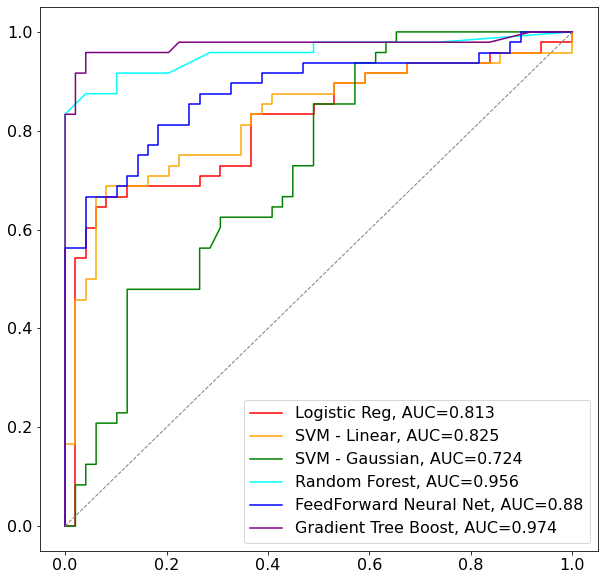

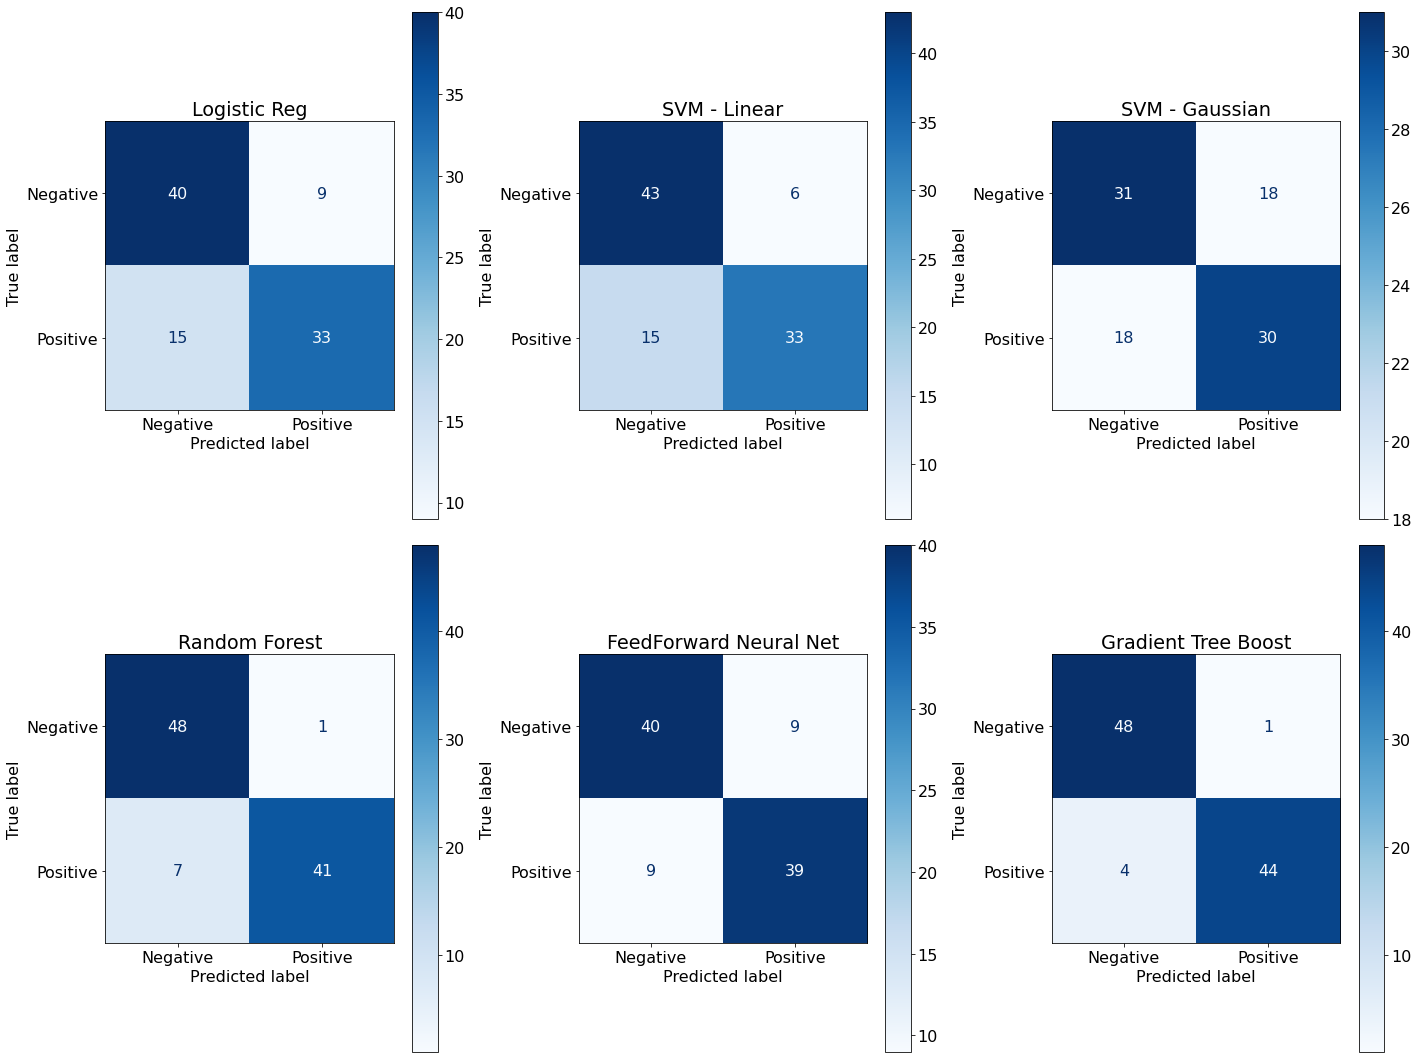

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (14).

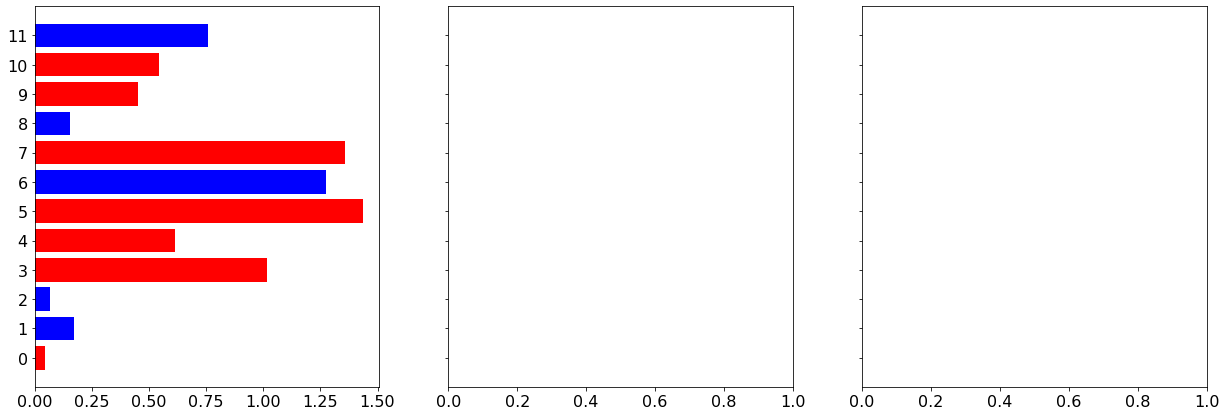

In [32]:
generate_analysis_figs(jake_features_df, 
                       grouped_analysis=False,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)


In [10]:
jake_features_df.iloc[1046,]

paper_id                   33219033                                                                                                                                                                                                                                                                                  
rel                        Although it is not clear how BDNF enhances expression of HNRNP A2/B1 in hippocampal neurons, we can present several possible modes of action.                                                                                                                                             
con                        hippocampal neuron                                                                                                                                                                                                                                                                        
con_sent                   For primary hippocampal neuron culture, we 

In [17]:
jake_features_df[jake_feature_df.annotation==True]

NameError: name 'jake_feature_df' is not defined

In [53]:
{key: value for key, value in paper2contexts.items() if key in jake_paper_pile.keys()}


{'27895401': {'1.2',
  'Cancer cells',
  'NCI-N87',
  'SNU-216',
  'cancer cell',
  'cancer cells',
  'min',
  'tumor cells'},
 '29531464': {'BAX',
  'Bax',
  'RP4',
  'SW480',
  'anchorage-independent growth',
  'and 1',
  'cancer cell',
  'cancer cell line',
  'cancer cells',
  'mimic'},
 '31205511': {'293T',
  'A549',
  'H1299',
  'H322',
  'Madison',
  'SEM',
  'Wei',
  'cancer cell',
  'cancer cells',
  'mimic'},
 '33219033': {'Bam',
  'CA1',
  'CMV',
  'Cy3',
  'Fisher',
  'HEK-293A',
  'HEK-293T',
  'Hpa',
  'Neuro2a',
  'Neuron',
  'Neurons',
  'PDF',
  'S10',
  'SEM',
  'SHSY5Y',
  'SP5',
  'Sal',
  'T cells',
  'TCS',
  'bona',
  'cancer cell',
  'hippocampal neuron',
  'human embryonic kidney',
  'min',
  'neuron',
  'neurons'},
 '30196810': {'Fisher',
  'SAS',
  'SEM',
  'oocyte',
  'sperm',
  'spermatozoa',
  'trophoblast'},
 '30483810': {'1.2',
  'AP-1',
  'DU145',
  'F12',
  'Fisher',
  'LNCaP',
  'PC3',
  'adipose tissue',
  'adiposity',
  'cancer cell',
  'cancer cell 

In [70]:
jake_df[jake_df.pmid=='29531464']

rel  \
6  Functional experiments indicated that lncRNA RP4 directly upregulated SH3GLB1 expression by acting as a competing endogenous RNA (ceRNA) for miR-7-5p.   

     con      pmid    pmcid     annot  
6  sw480  29531464  5840465  positive

In [12]:
jake_paper_pile

{'29531464': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ba8c7400>,
 '31452770': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ba8c7b50>,
 '28624221': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ba8c7b20>,
 '30809096': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ba8c7d90>,
 '27001519': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ab000b20>,
 '30008822': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ba8c7d60>,
 '27895401': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ab000970>,
 '23502316': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ac54ce50>,
 '28927100': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ab000af0>,
 '31205511': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ac54c6a0>,
 '27347099': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ac54cfa0>,
 '26464440': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ac587e20>,
 '30483810': <lit_contextizer.data_models.Paper.Paper at 0x7fb2ac565ca0>,
 '21131967': <lit_contextizer.data_mod

In [11]:
jake_paper_pile['17251317'].get_relations()[0].get_text()

KeyError: '17251317'

In [70]:
len(ena_df[ena_df.annotation])

626

In [77]:
X_test.columns

Index(['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp',
       'is_closest_cont_by_sent', 'con_in_mesh_headings', 'any_con_background',
       'any_con_methods', 'any_con_results', 'any_con_disc_conc',
       'norm_rel_sec_background', 'norm_rel_sec_discussion and conclusion',
       'norm_rel_sec_results'],
      dtype='object')

In [96]:
jake_merged = pd.merge(jake_features_df, jake_df,  how='left', on=["rel", "con"])
jake_merged = jake_merged[jake_merged['con_in_mesh_headings'].notna()]
jake_merged.con_in_mesh_headings = jake_merged.con_in_mesh_headings.astype(int)
jake_mat = pd.get_dummies(jake_merged[['sent_dist', 'sec_dist', 'norm_rel_sec', 'norm_con_sec', 'num_con_mentions', 'is_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings']])
jake_mat["norm_rel_sec_background"] = 0
jake_preds = gbc.predict(jake_mat[X_test.columns])

In [76]:
jake_merged["log_reg_preds"] = jake_preds

In [79]:
jake_merged[jake_merged.log_reg_preds]

paper_id  \
46   29343851   
48   29343851   
49   29343851   
50   29343851   
51   29343851   
..        ...   
816  27895401   
817  27895401   
818  27895401   
819  27895401   
820  27895401   

                                                                                                                                                     rel  \
46   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
48   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
49   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
50   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
51   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
..                                                                                                                                                   ...   
816  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
817  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
818  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
819  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              
820  Since HER2 downregulation suppressed AKT activation, it seems that HER2 inhibited JNK activation in GC cells through PI3K/AKT signaling.              

         con  \
46   mice      
48   ht29      
49   ht29      
50   ht29      
51   mice      
..    ...      
816  nci-n87   
817  snu-216   
818  nci-n87   
819  snu-216   
820  nci-n87   

                                                                                                                                                                                                                                     con_sent  \
46   Mice (five animals per group) were injected s.c.                                                                                                                                                                                           
48   g  Identification of NDRG2 protein expression in HT29 and HCT116 cells expressing an NDRG2-specific shRNA with or without 2 mM NaBT treatment.                                                                                             
49   In quiescent or serum stimulated HT29 and HCT116 cells, the presence of NDRG2 blocked serum-induced cell cycle progression and caused G1 arrest (Supplementary Fig.                                                                        
50   In accordance, p27 knockdown also blocked NDRG2 effects on AKP activity and E-cadherin expression in HT29 cells (Figs.                                                                                                                     
51   Confirming this point, either p21 or p27 knockdown accelerated the tumor developments, and resumed the growth inhibition of NDRG2 expression in nude mice (Figs.                                                                           
..                                                                                                                                                                ...                                                                           
816  Combined effects of AKT and JNK on the met

In [87]:
jake_merged[(jake_merged.con == "ht29") & (jake_merged.paper_id == "29343851")].drop_duplicates()

paper_id  \
42   29343851   
44   29343851   
45   29343851   
47   29343851   
48   29343851   
..        ...   
462  29343851   
463  29343851   
469  29343851   
471  29343851   
472  29343851   

                                                                                                                                                     rel  \
42   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
44   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
45   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
47   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
48   Further, NDRG2 suppression of Skp2 contributes to the inductions and stabilizations of p21 and p27, which are Skp2 target proteins for degradation.   
..                                                                                                                                                   ...   
462  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
463  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
469  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
471  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              
472  NDRG2 suppression of Skp2 controls cell differentiation.                                                                                              

      con  \
42   ht29   
44   ht29   
45   ht29   
47   ht29   
48   ht29   
..    ...   
462  ht29   
463  ht29   
469  ht29   
471  ht29   
472  ht29   

                                                                                                                                                             con_sent  \
42   Expectedly, ectopic NDRG2 expression markedly diminished the cell growth rate and DNA synthesis in HT29 and HCT116 cells (Supplementary Fig.                       
44   Accordingly, the mice with NDRG2-overexpressing HT29 cells developed tumors more slowly than the control group (Figs.                                              
45   a , b  NDRG2 suppresses tumor growth of HT29 cells in nude mice.                                                                                                   
47   in the right limb with 1 × 10 7  HT29 cells.                                                                                                                       
48   g  Identification of NDRG2 protein expression in HT29 and HCT116 cells expressing an NDRG2-specific shRNA with or without 2 mM NaBT treatment.                     
..                                                                                                                                              ...                     
462  a - c  We overexpressed wild-type Skp2 (wSkp2) and Skp2 S72A mutant (mSkp2) using relative expressing lentivirus in HT29 cells with or without NDRG2 expression.   
463  d , e  HT29 cells were transfected with control or Skp2 siRNA.                                                                                                     
469  HT29 cells were transfected with TOPflash or FOPflash and the indicated protein-expressing vectors.                                                                
471  Control or NDRG2-overexpressing HT29 cells were transfected with pcDNA3.1, 

In [92]:
jake_merged[(jake_merged.con == "hepatocytes")].drop_duplicates()

paper_id  \
0   26464440   
1   26464440   
2   26464440   
5   26464440   
8   26464440   
9   26464440   
10  26464440   
11  26464440   
12  26464440   
13  26464440   
17  26464440   
18  26464440   
19  26464440   
22  26464440   
23  26464440   
26  26464440   
27  26464440   
31  26464440   
32  26464440   
33  26464440   
34  26464440   

                                                                                                                                                                         rel  \
0   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
1   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
2   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
5   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
8   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
9   Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
10  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
11  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
12  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
13  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
17  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
18  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
19  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
22  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
23  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
26  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
27  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
31  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
32  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter by recruitment of NCoR1 instead of p300.   
33  Together, these results indicate that RORα represses CYP2E1 gene expression through regulation of the ERRE in upstream promoter

In [78]:
jake_mat.preds = jake_preds


/Users/dnsosa/opt/miniconda3/envs/sklearn-dev-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [99]:
sum(jake_preds)/len(jake_merged)

0.3279648609077599

##### Classifying Jake's annotations under the grouped model

In [100]:

jake_merged = pd.merge(jake_features_df, jake_df,  how='left', on=["rel", "con"])
jake_merged = jake_merged[jake_merged['con_in_mesh_headings'].notna()]
jake_merged.con_in_mesh_headings = jake_merged.con_in_mesh_headings.astype(int)

jake_df_grp = jake_merged.groupby(['rel', 'con'])
jj = jake_merged.assign(min_sent_dist=jake_df_grp['sent_dist'].transform(min),
                   min_sec_dist=jake_df_grp['sec_dist'].transform(min),
                   any_con_fp=jake_df_grp['is_con_fp'].transform(max),
                   any_rel_disc_conc=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_rel_background=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('background').any()),
                   any_rel_methods=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('methods').any()),
                   any_rel_results=jake_df_grp['norm_rel_sec'].transform(lambda x: x.eq('results').any()),
                   any_con_disc_conc=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('disicussion and conclusion').any()),
                   any_con_background=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('background').any()),
                   any_con_methods=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('methods').any()),
                   any_con_results=jake_df_grp['norm_con_sec'].transform(lambda x: x.eq('results').any()),)

jj2 = jj[['rel', 'con', 'min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc']].drop_duplicates().dropna()
jake_mat = pd.get_dummies(jj2[['min_sent_dist', 'min_sec_dist', 'num_con_mentions', 'any_con_fp', 'is_closest_cont_by_sent', 'con_in_mesh_headings', 'norm_rel_sec', 'any_con_background', 'any_con_methods', 'any_con_results', 'any_con_disc_conc']])
jake_mat["norm_rel_sec_background"] = 0
jake_preds = gbc.predict(jake_mat[X_test.columns])



print(sum(jake_preds) / len(jake_preds))

KeyError: "['sent_dist', 'norm_con_sec_discussion and conclusion', 'norm_con_sec_background', 'norm_con_sec_methods', 'sec_dist', 'norm_con_sec_results', 'is_con_fp'] not in index"

### Miscellaneous Scripts

In [15]:
# Code for downloading papers a la Jake!

import json
import os.path
from os import path

# Read in the raw records
pmcid_list = []
pmid_list = []
with open("../input/annotated_documents.json") as doc_json_file:
    count = 0
    # count_not_in_keys = 0

    # For each file, create a new paper object
    for line in doc_json_file:
        record = json.loads(line)

        count += 1
        
        if 'pmc' not in record.keys():
            continue
            
        pmid = record['doc_id'].split("|")[0]
        pmid_list.append(pmid)
        pmcid = record['pmc']
        pmcid_list.append(pmcid)
        out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"
        continue
        
        if not path.exists(out_path):
            !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={out_path} --oFormat=biocxml
        else:
            print("File already downloaded")
        
        # run me....
        #if count == 175:
        #    break

In [22]:
# Code for retrieving the val full texts

pmcids = ["PMC2156142", "PMC3032653", "PMC3135394", "PMC3198449", "PMC3233644", "PMC3461631", "PMC4052680", "PMC4250046", "PMC4746590", "PMC534114"]

for pmcid in pmcids:
    out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"

    if not path.exists(out_path):
            !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pmc --identifier={pmcid} --email=dnsosa@stanford.edu --o={out_path} --oFormat=biocxml
    else:
        print("File already downloaded")


File already downloaded
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3032653.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3135394.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3198449.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3233644.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC3461631.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC4052680.biocxml complete
Fetching and converting 1 files from pmc
Output to /Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/PMC4250046.biocxml complete
Fetching and converting 1 files from p

In [3]:
# Code for figuring out normalizations

all_section_names = set()
for paper_id in dl.paper_pile:
    paper = dl.paper_pile[paper_id]
    for cont in paper.get_context_list():
        #print(paper.get_section_type(cont))
        all_section_names.add(paper.get_section_type(cont)[1])
        
        
print(all_section_names)

{'results', 'conclusions', 'statistical methods', 'statistics', 'ethics statement', None, 'summary', 'data analysis', 'consent', 'study design', 'statistical analyses', 'funding', 'method', 'competing interests', 'patients and methods', 'author contributions', 'additional information', 'data collection', 'supplementary data', 'authors’ contributions', 'statistical analysis', 'introduction', 'conflict of interest', 'methods', 'conclusion', 'material and methods', 'materials and methods', 'None', 'discussion', 'background', 'limitations', 'participants', 'materials', 'results and discussion', "authors' contributions", 'abbreviations'}


#### Future analyses-- New feature: BERT

In [27]:
from biobert_embedding.embedding import BiobertEmbedding

text = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."\

# Class Initialization (You can set default 'model_path=None' as your finetuned BERT model path while Initialization)
biobert = BiobertEmbedding()

word_embeddings = biobert.word_vector(text)
sentence_embedding = biobert.sentence_vector(text)

print("Text Tokens: ", biobert.tokens)
# Text Tokens:  ['breast', 'cancers', 'with', 'her2', 'amplification', 'have', 'a', 'higher', 'risk', 'of', 'cns', 'metastasis', 'and', 'poorer', 'prognosis', '.']

print ('Shape of Word Embeddings: %d x %d' % (len(word_embeddings), len(word_embeddings[0])))
# Shape of Word Embeddings: 16 x 768

print("Shape of Sentence Embedding = ",len(sentence_embedding))
# Shape of Sentence Embedding =  768

Text Tokens:  ['breast', 'cancers', 'with', 'her2', 'amplification', 'have', 'a', 'higher', 'risk', 'of', 'cns', 'metastasis', 'and', 'poorer', 'prognosis', '.']
Shape of Word Embeddings: 16 x 768
Shape of Sentence Embedding =  768


In [31]:
import numpy as np

np.array(sentence_embedding)

array([ 2.83243835e-01,  3.25193852e-02, -3.24836403e-01, -1.89797744e-01,
        1.37286400e-02, -6.57656044e-02,  1.63433962e-02,  1.49647802e-01,
        1.95996642e-01, -1.24012209e-01, -6.26029149e-02,  2.20519751e-01,
       -2.77940363e-01,  2.73949921e-01, -3.50311548e-01, -6.33125305e-02,
       -1.37052551e-01, -5.65508194e-02,  7.48364180e-02, -2.72994816e-01,
       -2.46691063e-01, -1.58229664e-01,  1.42800380e-02,  1.44963771e-01,
        1.73810437e-01, -1.64249659e-01, -8.95009190e-02,  2.09926322e-01,
        1.38269573e-01, -1.83084607e-02, -1.18894465e-01, -5.36878891e-02,
       -1.37515411e-01,  9.45411548e-02,  1.99569568e-01,  4.36311871e-01,
        1.29929453e-01,  4.96568158e-02, -2.58787096e-01,  2.98889309e-01,
        4.10243012e-02, -4.29470479e-01, -1.06973341e-02,  4.23908919e-01,
       -1.50279410e-03, -2.37091288e-01, -9.87396315e-02, -2.81365663e-01,
       -4.10363615e-01, -1.77583858e-01, -2.64389336e-01,  3.33206020e-02,
        1.46826848e-01,  

In [35]:
xx = "This is a sentence. This is another sentence. Hello again. Why yes, this too is yet another sentence. The mitochondria is the powerhouse of the cell"

sembs = [np.array(biobert.sentence_vector(sent)) for sent in xx]

In [36]:
sembs

[array([ 6.67834356e-02,  1.28442124e-01, -3.70868832e-01, -3.48633170e-01,
        -7.68839180e-01,  3.05240244e-01,  3.59766893e-02,  5.94879799e-02,
         2.95784205e-01, -3.49480003e-01,  6.70411205e-03,  3.85696143e-01,
        -5.12853861e-01, -3.85972381e-01, -7.80905068e-01,  3.49618524e-01,
         7.83241466e-02,  3.08229774e-01,  1.56245351e-01,  6.16776884e-01,
        -3.56325537e-01, -3.31258357e-01, -2.51513571e-01,  4.57605207e-03,
        -1.52875215e-01,  3.87392901e-02,  3.22393507e-01, -2.21916378e-01,
        -2.06851289e-01, -1.99035868e-01,  6.22178316e-02,  3.32851321e-01,
        -5.76305926e-01, -4.52923514e-02, -5.74830592e-01,  2.10181117e-01,
        -1.96163612e-03,  1.02796061e-02, -8.92940685e-02, -2.89222091e-01,
         1.08849414e-01, -2.37972081e-01,  3.08350295e-01, -1.63382947e-01,
        -1.85491756e-01, -3.66523176e-01, -2.35449731e-01,  3.07630505e-02,
         1.50850639e-01,  2.13979542e-01,  1.26415059e-01,  3.21338207e-01,
         2.6

In [3]:
len(sentence_embedding)

768

In [15]:
import bioc

paper_ids = ["PMC2156142", "PMC3032653", "PMC3135394", "PMC3198449", "PMC3233644", "PMC3461631", "PMC4052680",
                     "PMC4250046", "PMC4746590", "PMC534114"]


for paper_id in paper_ids:
    ena_full_text_file = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{paper_id}.biocxml"
    
    #!python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/showMeSH.py --inBioc {ena_full_text_file}
    

    # Open the full text
    with open(ena_full_text_file, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        for doc in parser:
            print(doc.infons['pmid'])

10459009
21258369
21746850
22039431
22081024
23050142
24467442
25438156
26856619
15550174


In [ ]:
import time
from biobert_embedding.embedding import BiobertEmbedding

biobert = BiobertEmbedding()
 
start = time.time()
ct = 0
for sent in dl.paper_pile['PMC5292560'].get_full_text().split(". "):
    
    ct += 1
    sentence_embedding = biobert.sentence_vector(sent)
    
    print(f"{time.time() - start} seconds elapsed")

In [ ]:
import os
import bioc
import time
from biobert_embedding.embedding import BiobertEmbedding

biobert = BiobertEmbedding()

all_papers_embs = []

for pmcid in dl.ena_paper_pile:
    
    pmcid_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/full_texts/{pmcid}.biocxml"

    if os.path.exists(pmcid_path):
        full_text_in_sections = []
        full_text_embs = []
        sec_mapper = {}
        with open(pmcid_path, 'rb') as f:
            parser = bioc.BioCXMLDocumentReader(f)
            document = parser.__next__()

            for sec_idx, sec in enumerate(document.passages):
                full_text_in_sections.append(sec.text)
                sec_type = sec.infons['subsection']
                sent_list = [s + "." for s in sec.text.split(". ") if s]
                sec_embs = []
                for sent in sent_list:
                    sec_mapper[sent] = (sec_idx, sec_type)
                    sent_emb = biobert.sentence_vector(sent)
                    sec_embs.append(sent_emb)
                    
                full_text_embs.append(sec_embs)
            
    all_papers_embs.append(full_text_embs)

to be continued...

#### For looking at MeSH headings a la Jake's showMeSH script

In [3]:

import os
import bioc

pmids = ["10459009",
"21258369",
"21746850",
"22039431",
"22081024",
"23050142",
"24467442",
"25438156",
"26856619",
"15550174"]

for pmid in pmids:
    
    pmid_out_path = f"/Users/dnsosa/Desktop/AltmanLab/bai/biotext/pubmed_texts/PM{pmid}.biocxml"

    with open(pmid_out_path, 'rb') as f:
        parser = bioc.BioCXMLDocumentReader(f)
        doc = parser.__next__()
        pmid = doc.infons['pmid']
        title = doc.infons['title']
        mesh = doc.infons['meshHeadings']
        print(mesh.lower())
        print("drosophila" in mesh.lower())

    
    #if not os.path.exists(pmid_out_path):
    #    !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/convertEUtils.py --database=pubmed --identifier={pmid} --email=dnsosa@stanford.edu --o={pmid_out_path} --oFormat=biocxml
    !python /Users/dnsosa/Desktop/AltmanLab/bai/biotext/showMeSH.py --inBioc {pmid_out_path}
    
        
# NOTE: Need to get MeSH headings for all PubMed files





descriptor|d000483|n|alleles	descriptor|d000595|n|amino acid sequence	descriptor|d000818|n|animals	descriptor|d002352|n|carrier proteins~qualifier|q000737|n|chemistry~qualifier|q000235|y|genetics~qualifier|q000378|y|metabolism	descriptor|d003001|n|cloning, molecular	descriptor|d029721|n|drosophila proteins	descriptor|d004331|n|drosophila melanogaster~qualifier|q000033|n|anatomy & histology~qualifier|q000196|n|embryology~qualifier|q000235|n|genetics~qualifier|q000254|y|growth & development	descriptor|d015870|n|gene expression	descriptor|d020043|n|genes, essential~qualifier|q000235|n|genetics	descriptor|d017344|n|genes, insect~qualifier|q000235|n|genetics	descriptor|d005816|n|genetic complementation test	descriptor|d006160|n|guanosine triphosphate~qualifier|q000378|n|metabolism	descriptor|d019476|n|insect proteins~qualifier|q000737|n|chemistry~qualifier|q000235|n|genetics~qualifier|q000378|n|metabolism	descriptor|d007814|n|larva~qualifier|q000235|n|genetics~qualifier|q000254|n|growth & d

AttributeError: 'NoneType' object has no attribute 'lower'

In [5]:
doc

BioCDocument[id=23050142,infons=[title=The role of semaphorins and their receptors in gliomas.,pmid=23050142,pmcid=PMC3461631,doi=10.1155/2012/902854,year=2012,month=10,day=11,journal=Journal of signal transduction,journalISO=J Signal Transduct,authors=Janice Wai Sze Law, Alan Yiu Wah Lee,chemicals=None,meshHeadings=None,supplementaryMesh=None,publicationTypes=Journal Article],passages=[BioCPassage[offset=0,text='The role of semap ... ptors in gliomas.',infons=[section=title],sentences=[],annotations=[],relations=[],],BioCPassage[offset=55,text='Gliomas are the m ... s also discussed.',infons=[section=abstract],sentences=[],annotations=[],relations=[],]],annotations=[],relations=[],]

# Now trying to combine with DS corpus

### Relation-Context Classification

Now onto the classification of relation with context terms. Featurized representations of the papers in the ENA annotation corpus will be split and used as training/test sets.

In [1]:
from os import path
import lit_contextizer as lc
import pandas as pd
from lit_contextizer.data_models.PaperUtilities import extract_features

print("Done loading pkg")

contra_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_all_papers_v2.csv"
ena_df_path = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/output/extracted_features_enrique_papers_v2.csv"


dl = lc.data_models.DataLoader.DataLoader()
print("Done initializing")
# NOTE! Make sure to parse_annotated first. Need to fix code to not overwrite
dl.parse_annotated_full_texts(cell_type_only=True) # tot: 21243
print("Done with full texts")
dl.parse_relationships_file()
print("Done with relationships")
all_annotators_df, annotated_connects = dl.parse_annotation_files_for_ena()

if not path.exists(contra_df_path):
    print("Need to extract features for Contradictions papers corpus") # Will take 1h20!
    #contra_df = extract_features(dl.paper_pile, no_cell_line=True) # NOTE We don't have MeSH headings for these yet....
    #contra_df.to_csv(contra_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for Contradictions papers")
    contra_df = pd.read_csv(contra_df_path)
    print("Loaded.")
    
if not path.exists(ena_df_path):
    print("Need to extract features for ENA papers corpus")
    #ena_df = extract_features(dl.ena_paper_pile, annotated_connects=annotated_connects, do_calculate_pmi=False, do_calculate_in_mesh=True, is_enrique=True)
    #ena_df.to_csv(ena_df_path)
    print("Finished extracting and saving extracted features for Contradictions papers corpus...")
else:
    print("Extracted features file found for ENA papers")
    ena_df = pd.read_csv(ena_df_path)
    print("Loaded.")    

    

print(len(contra_df))
print(len(ena_df))
print(len(dl.paper_pile))


/Users/dnsosa/opt/miniconda3/envs/lit_con/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done loading pkg
Done initializing
0 full texts read (of 21243)
No PMC for record 95
No PMC for record 111
No abstract for record PMC5509451
No title for record PMC4757870
No PMC for record 291
No abstract for record PMC5599977
No abstract for record PMC3953084
No title for record PMC6896798
No PMC for record 655
No abstract for record PMC6220479
No abstract for record PMC5482590
No abstract for record PMC4075648
No PMC for record 982
1000 full texts read (of 21243)
No text for record PMC2478564
No abstract for record PMC526782
No PMC for record 1419
No abstract for record PMC4694057
No PMC for record 1744
No PMC for record 1921
No title for record PMC6361748
No PMC for record 1984
No PMC for record 1993
No PMC for record 1993
2000 full texts read (of 21243)
No abstract for record PMC3784508
No PMC for record 2089
No abstract for record PMC7113201
No abstract for record PMC5374603
No abstract for record PMC3287601
No title for record PMC6803382
No abstract for record PMC4044980
No abst

/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/src/lit_contextizer/data_models/DataLoader.py:367: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Extracted features file found for Contradictions papers
Loaded.
Extracted features file found for ENA papers
Loaded.
1102208
30239
21209


In [2]:
# Now analyze and combine the results from the Jake filtration

import os
import pandas as pd

jake_papers = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

adipose_res_path = os.path.join(jake_papers, "adipose_tissue_ppi_pmc_df.csv")
cardiac_res_path = os.path.join(jake_papers, "cardiac_muscle_ppi_pmc_df.csv")
liver_res_path = os.path.join(jake_papers, "liver_ppi_pmc_df.csv")
lung_res_path = os.path.join(jake_papers, "lung_ppi_pmc_df.csv")
pancreatic_res_path = os.path.join(jake_papers, "pancreatic_islet_ppi_pmc_df.csv")

adipose_res = pd.read_csv(adipose_res_path, index_col=0)
cardiac_res = pd.read_csv(cardiac_res_path, index_col=0)
liver_res = pd.read_csv(liver_res_path, index_col=0)
lung_res = pd.read_csv(lung_res_path, index_col=0)
pancreatic_res = pd.read_csv(pancreatic_res_path, index_col=0)


adipose_res["context_term"] = "adipose"
adipose_res["context_term_prefix"] = "adipo"

cardiac_res["context_term"] = "cardiac"
cardiac_res["context_term_prefix"] = "cardiac"

liver_res["context_term"] = "liver"
liver_res["context_term_prefix"] = "liver"

lung_res["context_term"] = "lung"
lung_res["context_term_prefix"] = "lung"

pancreatic_res["context_term"] = "pancreatic"
pancreatic_res["context_term_prefix"] = "islet"  # NOTE: not islets specifically 


all_res_combined = pd.concat([adipose_res, cardiac_res, liver_res, lung_res, pancreatic_res], ignore_index=True)

out_dir = "/Users/dnsosa/Desktop/AltmanLab/bai/Stanford-Collab/notebooks/jake_papers"

ppi_ds_features_df = pd.read_csv(os.path.join(out_dir,  "ppi_pmc_features_df.csv"))

ppi_ds_features_df["annotation"] = True

print(f"Length of PPI-DS Features DataFrame: {len(ppi_ds_features_df)}")

ena_df = ena_df.loc[:, ~ena_df.columns.str.match('Unnamed')]
ena_and_ppi_ds_features_df = pd.concat([ena_df, ppi_ds_features_df])

print(f"Combined ENA and PPI-DS DataFrames have: {len(ena_and_ppi_ds_features_df[ena_and_ppi_ds_features_df.annotation == True])} positives.")
print(f"Combined ENA and PPI-DS DataFrames have: {len(ena_and_ppi_ds_features_df[ena_and_ppi_ds_features_df.annotation == False])} negatives.")


Length of PPI-DS Features DataFrame: 34860
Combined ENA and PPI-DS DataFrames have: 35486 positives.
Combined ENA and PPI-DS DataFrames have: 29613 negatives.


In [21]:
print(len(ppi_ds_features_df))

34860


In [10]:
ppi_ds_features_df[ppi_ds_features_df.con != "pancreatic"]

paper_id  \
66     PMC6060507   
67     PMC6332843   
68     PMC6332843   
69     PMC6332843   
70     PMC6332843   
...           ...   
34491  PMC3757825   
34492  PMC3757825   
34493  PMC3757825   
34494  PMC3757825   
34495  PMC3757825   

                                                                                                                                                                                                                                                                    rel  \
66     For instance, miR205 upregulates AKT dependent activation of FOXO3a in lung cancer cell via suppressing PTEN [ 39 ] .                                                                                                                                              
67     This suggests that IL-10 can induce the expression of PD-L1 via certain factors present in cells [ 93 ] .                                                                                                                                                          
68     This suggests that IL-10 can induce the expression of PD-L1 via certain factors present in cells [ 93 ] .                                                                                                                                                          
69     In hepatocellular carcinoma and lung cancer, TGF-β can induce the expression of PD-L1 on the surface of DCs, which depends on the activation of STAT3 [ 109 , 110 ] .                                                                                              
70     In hepatocellular carcinoma and lung cancer, TGF-β can induce the expression of PD-L1 on the surface of DCs, which depends on the activation of STAT3 [ 109 , 110 ] .                                                                                              
...                                                                                                                                                                      ...                                                                                              
34491  [ 137 ] A recent work from Parikh et al. demonstrated on pulmonary artery endothelial cells that BMP dependent signalling activation of miR-21 represses Rho-kinase activation, thus counteracting the Rho signalling in promoting pulmonary vascular pathology.   
34492  [ 137 ] A recent work from Parikh et al. demonstrated on pulmonary artery endothelial cells that BMP dependent signalling activation of miR-21 represses Rho-kinase activation, thus counteracting the Rho signalling in promoting pulmonary vascular pathology.   
34493  [ 137 ] A recent work from Parikh et al. demonstrated on pulmonary artery endothelial cells that BMP dependent signalling activation of miR-21 represses Rho-kinase activation, thus counteracting the Rho signalling in promoting pulmonary vascular pathology.   
34494  [ 137 ] A recent work from Parikh et al. demonstrated on pulmonary artery endothelial cells that BMP dependent signalling activation of miR-21 represses Rho-kinase activation, thus counteracting the Rho signalling in promoting pulmonary vascular pathology.   
34495  [ 137 ] A recent work from Parikh et al. demonstrated on pulmonary artery endothelial cells that BMP dependent signalling activation of miR-21 represses Rho-kinase activation, thus counteracting the Rho signalling in promoting pulmonary vascular pathology.   

           con  \
66     cardiac   
67     adipose   
68     adipose   
69     adipose   
70     adipose   
...        ...   
34491  lung      
34492  lung      
34493  lung      
34494  lung      
34495  lung      

                                                                                                                                                                                                                                                                                                                                              

In [18]:
ena_df[ena_df.annotation].sample(n=100, random_state=1).to_csv("ena_with_features_pos_100_df.tsv", sep="\t", index=False, header=True)
ena_df[ena_df.annotation == False].sample(n=100, random_state=1).to_csv("ena_with_features_neg_100_df.tsv", sep="\t", index=False, header=True)
ppi_ds_features_df.sample(n=100, random_state=1).to_csv("ppi_ds_with_features_100_df.tsv", sep="\t", index=False, header=True)


Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net
Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.8171593366979092
Looking at clf: SVM - Linear
Accuracy 0.8178803172314347
Looking at clf: SVM - Gaussian
Accuracy 0.7953857245854362
Looking at clf: Random Forest
Accuracy 0.9632299927901946
Looking at clf: FeedForward Neural Net
Accuracy 0.9322278298485941
Looking at clf: Gradient Tree Boost
Accuracy 0.9322278298485941


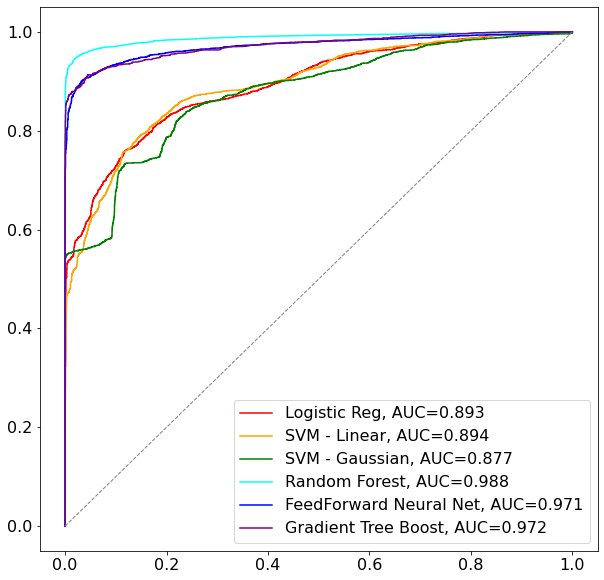

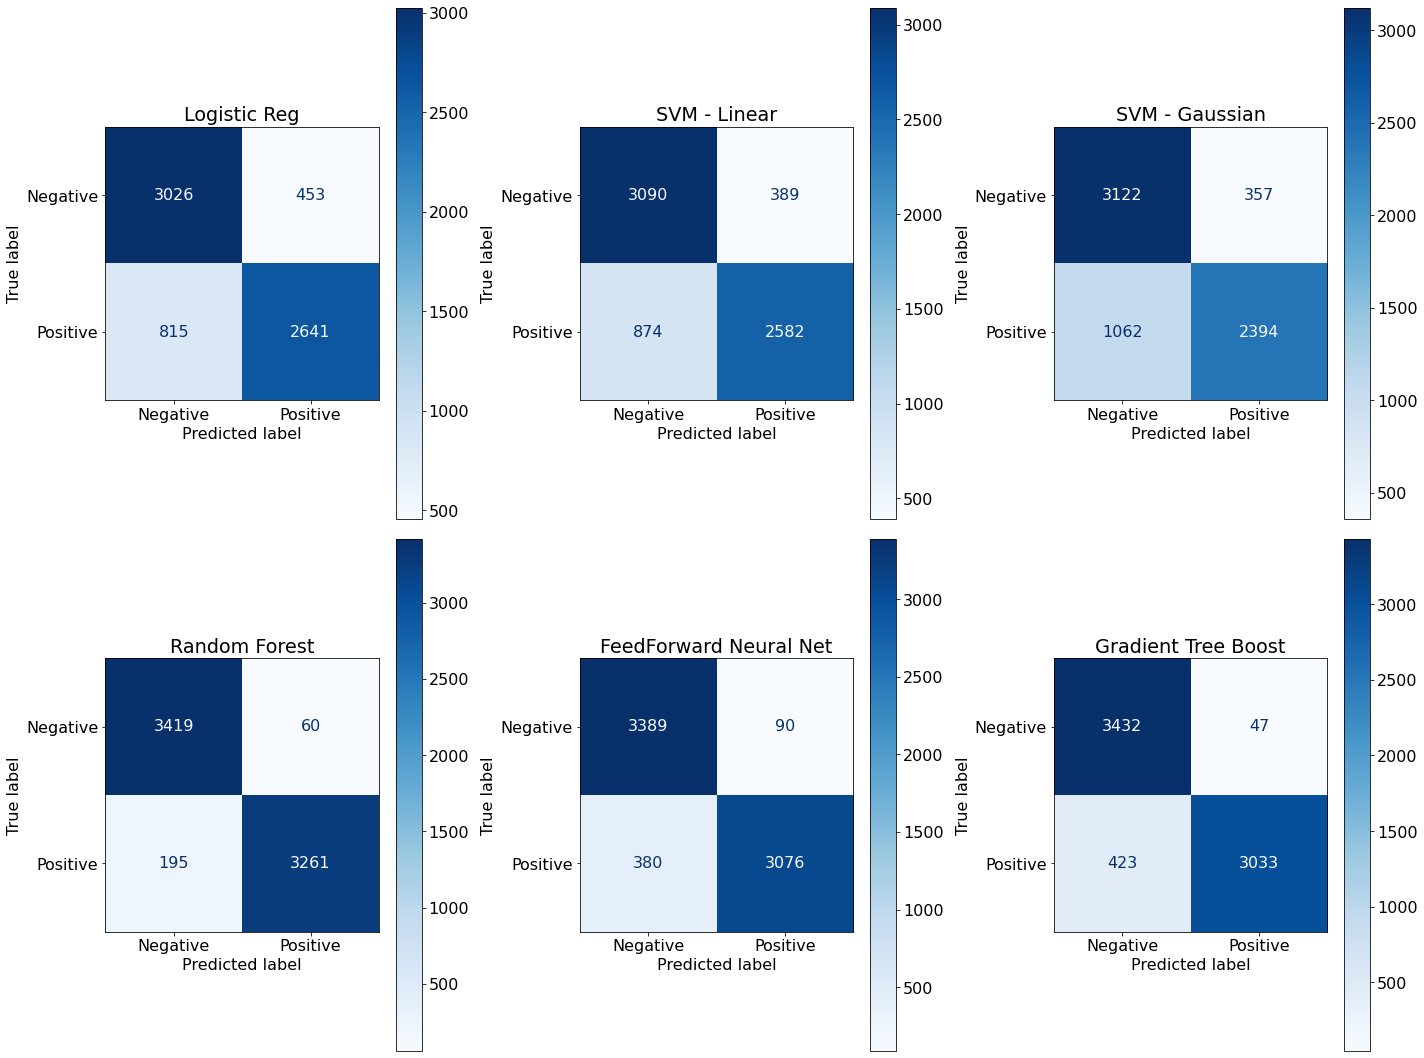

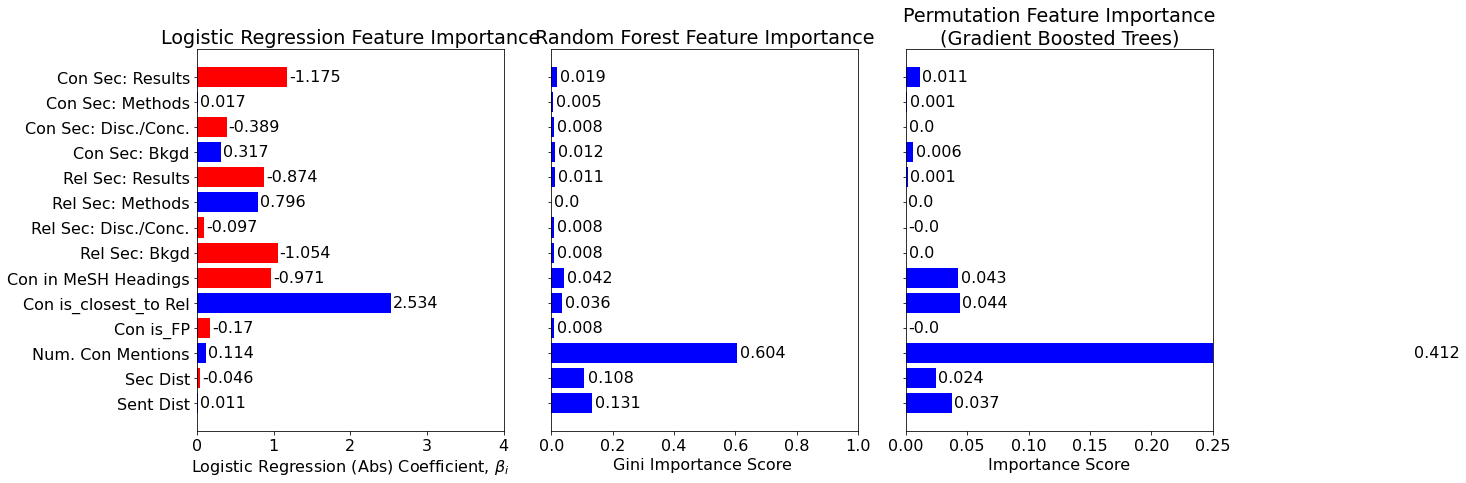

In [92]:
generate_analysis_figs(ena_and_ppi_ds_features_df,
                       grouped_analysis=False,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)


Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.8122759856630825
Looking at clf: SVM - Linear
Accuracy 0.7912186379928315
Looking at clf: SVM - Gaussian
Accuracy 0.6765232974910395
Looking at clf: Random Forest
Accuracy 0.9238351254480287
Looking at clf: FeedForward Neural Net
Accuracy 0.8870967741935484
Looking at clf: Gradient Tree Boost
Accuracy 0.8830645161290323


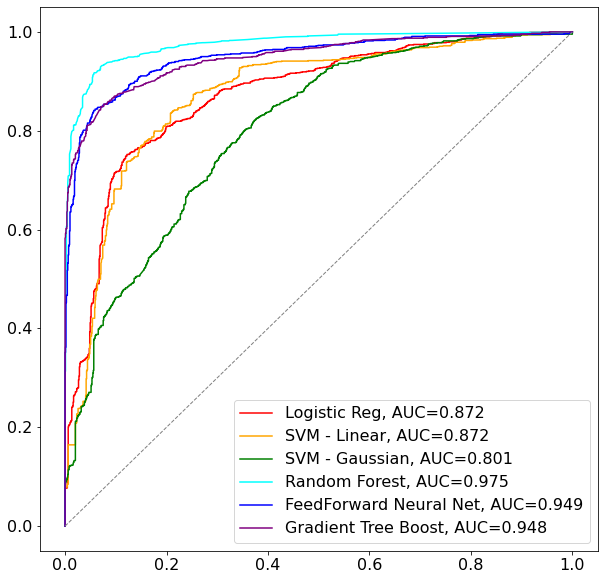

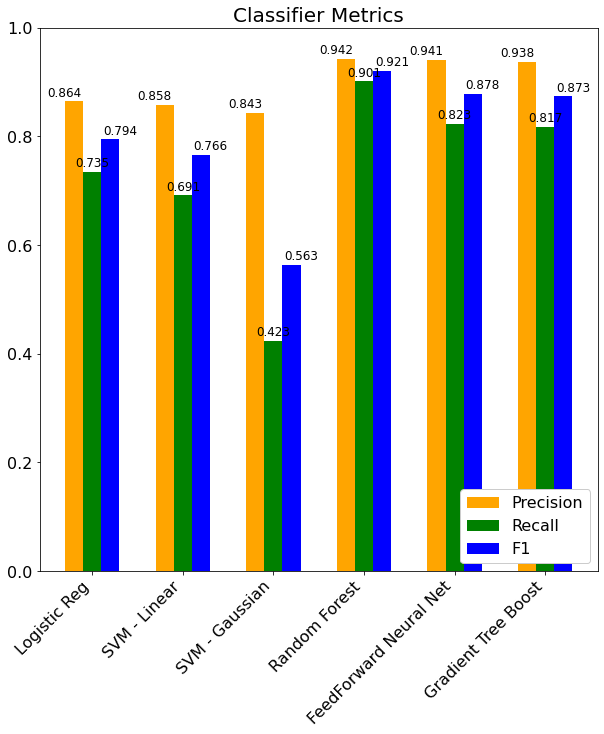

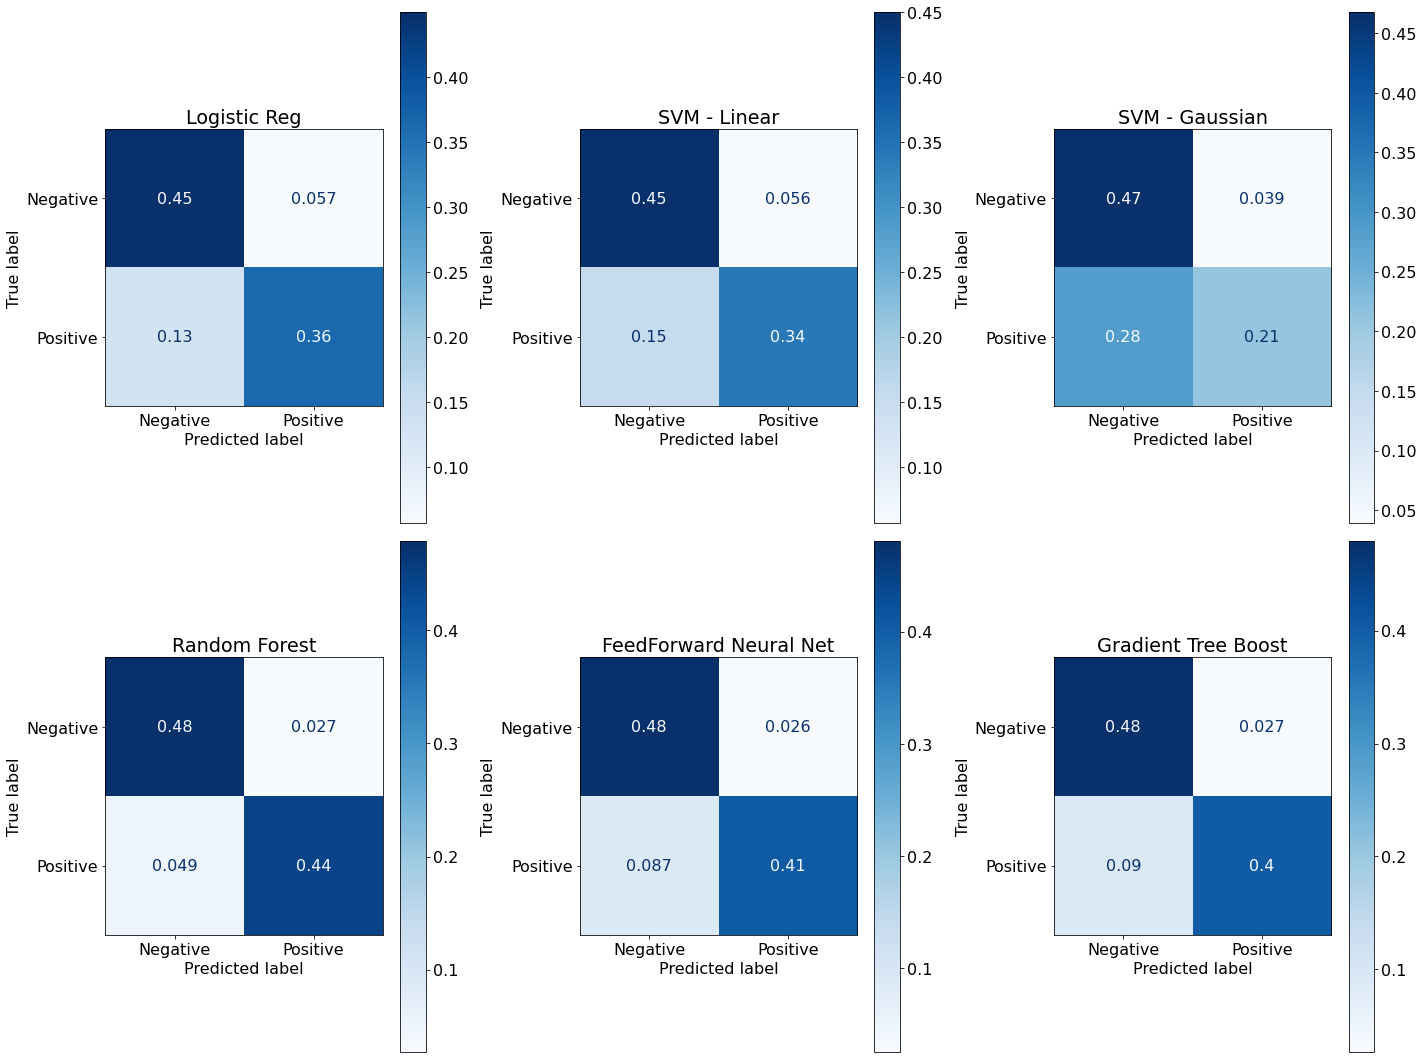

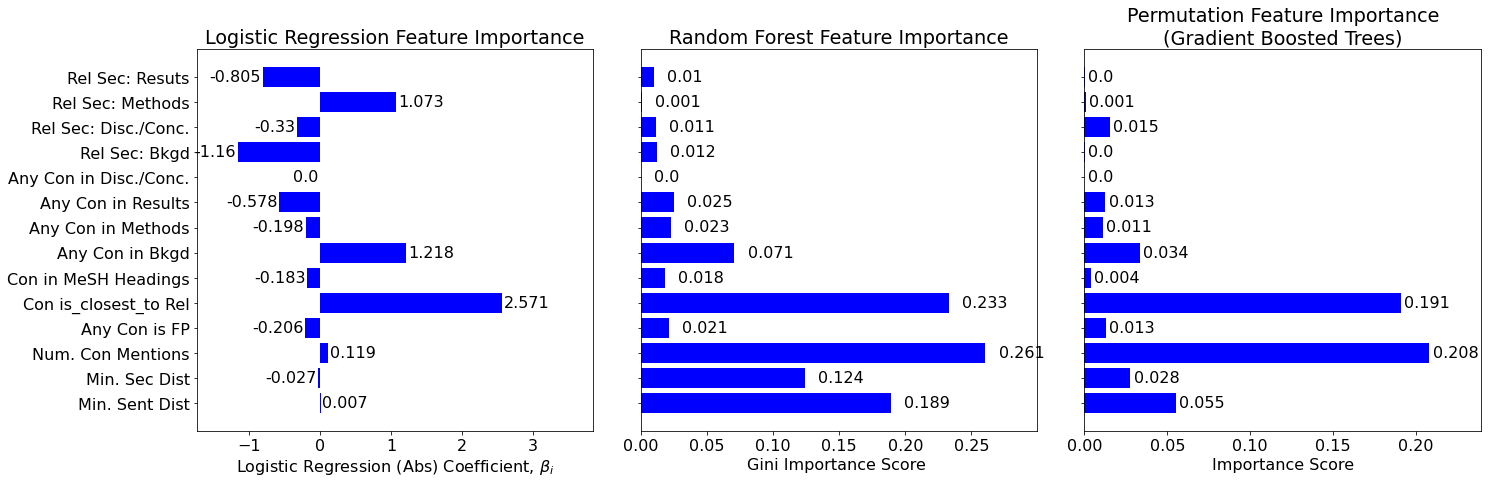

In [134]:
generate_analysis_figs(ena_and_ppi_ds_features_df,
                       grouped_analysis=True,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)


Fitting model: Logistic Reg
Fitting model: SVM - Linear
Fitting model: SVM - Gaussian
Fitting model: Random Forest
Fitting model: FeedForward Neural Net


/Users/dnsosa/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model: Gradient Tree Boost
Looking at clf: Logistic Reg
Accuracy 0.8260869565217391
Looking at clf: SVM - Linear
Accuracy 0.8840579710144928
Looking at clf: SVM - Gaussian
Accuracy 0.7463768115942029
Looking at clf: Random Forest
Accuracy 0.9420289855072463
Looking at clf: FeedForward Neural Net
Accuracy 0.9130434782608695
Looking at clf: Gradient Tree Boost
Accuracy 0.9420289855072463


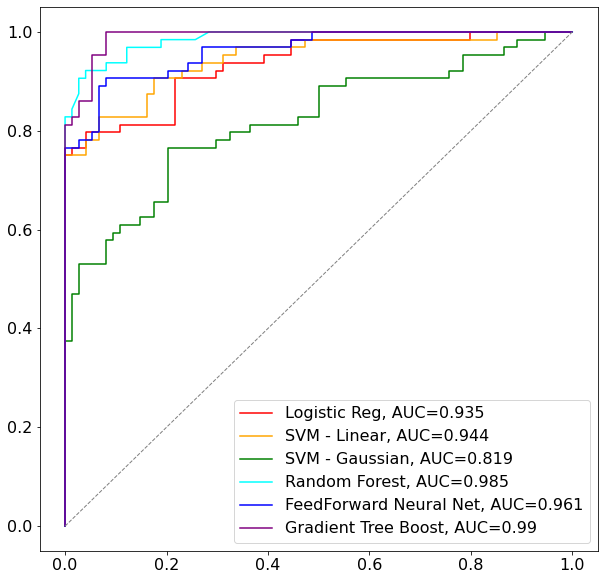

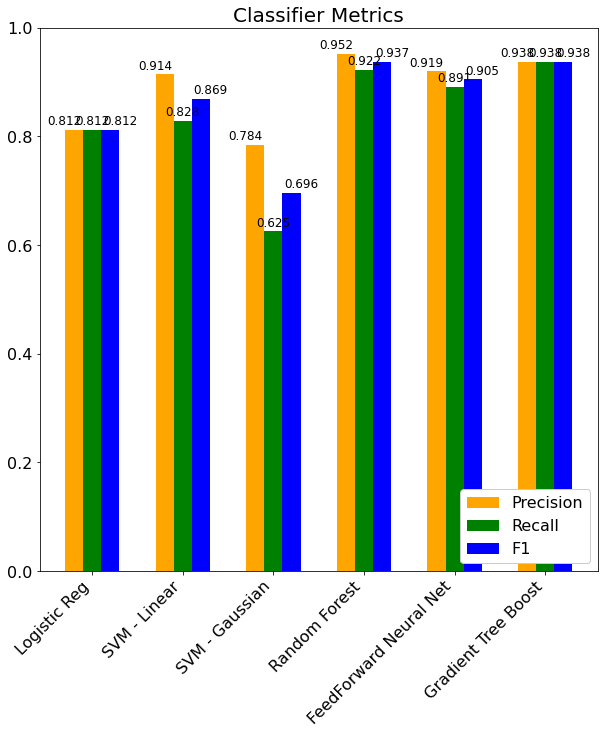

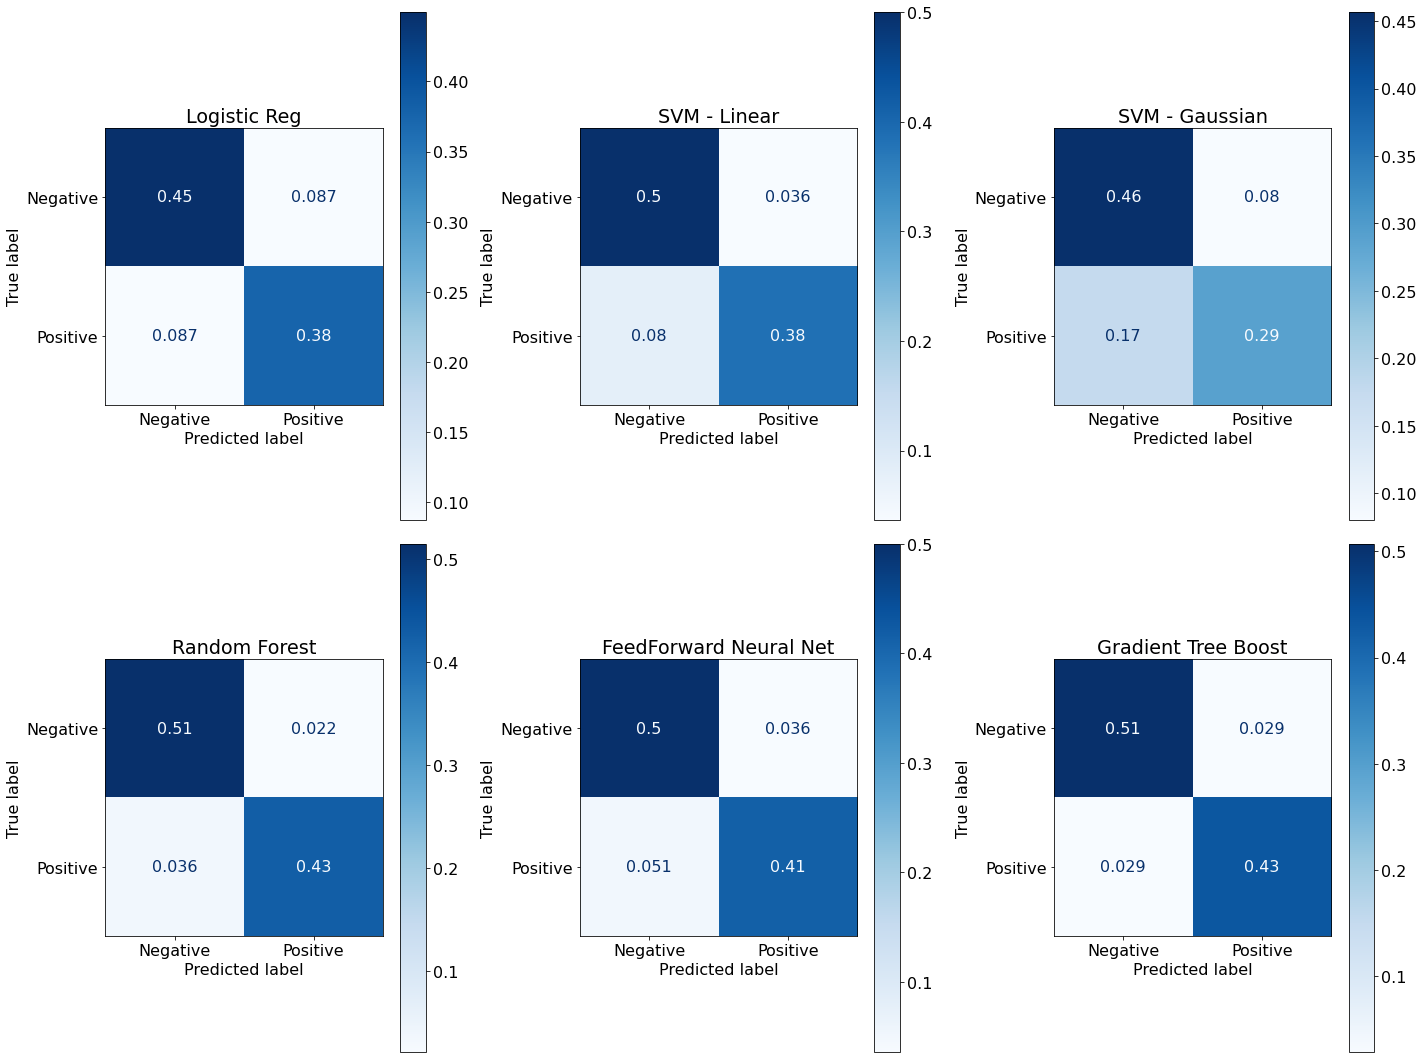

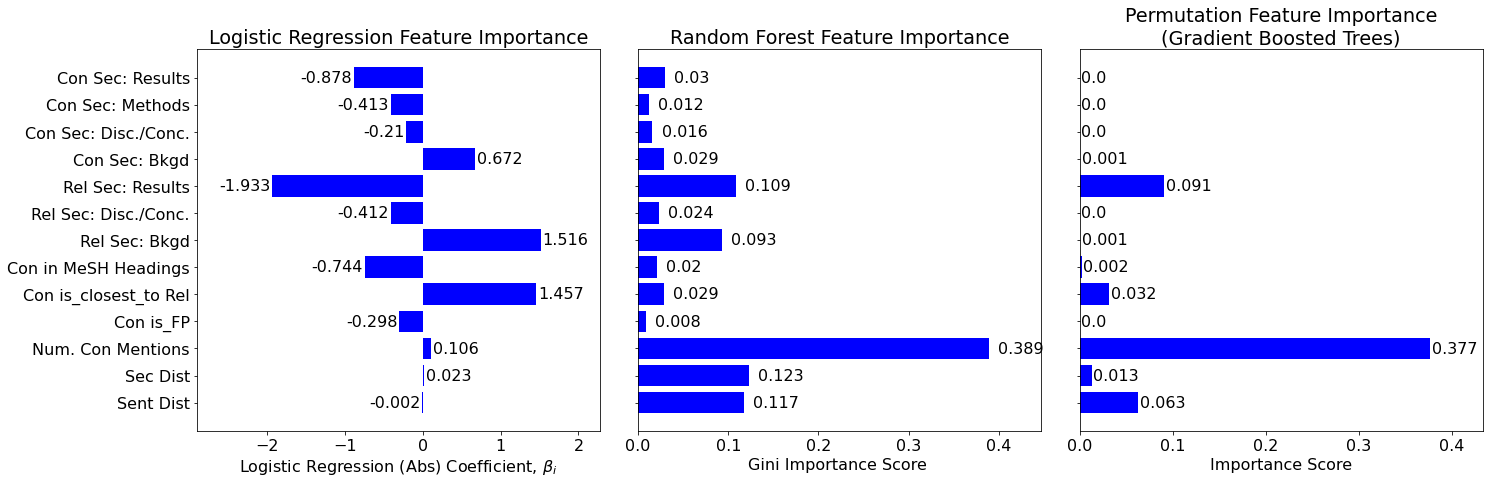

In [138]:
ppi_ds_jake_negs_features_df = pd.concat([jake_features_df[jake_features_df.annotation==False], ppi_ds_features_df])

generate_analysis_figs(ppi_ds_jake_negs_features_df,
                       grouped_analysis=False,
                       downsample_maj=True,
                       upsample_min=False,
                       weight_imbalance=False,
                       plot_roc_curve=True,
                       plot_confusion_matrices=True,
                       plot_feature_analysis=True)



459